## Autism Risk Prediction Using Machine Learning

 **Problem Statement**
 
The prevalence of Autism Spectrum Disorder (ASD) is increasing, impacting individuals and families significantly. ASD manifests as challenges in communication, social interaction, repetitive behaviors, and sensory sensitivities. Early detection is critical but often delayed due to time-intensive and resource-heavy screening processes. This project aims to leverage machine learning models to automate early detection of ASD risk, enabling timely intervention and reducing the diagnostic burden.

**Dataset Details**

The collected dataset comprises developmental metrics and demographic data for 50,000 children, ranging from 12 to 60 months. It includes 30 attributes, such as gaze patterns, joint attention, babbling frequency, response to name, and other key indicators related to developmental and cognitive metrics. The dataset also captures sensory sensitivity levels, motor skill development, and parental concerns.

The target variable, Parental Concern Flag, indicates whether a child has been flagged for potential developmental concerns. This dataset serves as a foundation for predictive modeling aimed at early autism risk detection.

**Business Objective**

The objective of this project is to develop a best machine learning model to predict autism risk in children aged 12–60 months using developmental and cognitive metrics. By leveraging attributes such as gaze patterns, social engagement, joint attention, and parental concerns, the model aims to accurately identify children at risk of autism spectrum disorder (ASD). This early detection system will enable timely interventions, improving developmental outcomes and reducing stress for families and caregivers.

**Import necessary libraries and screening dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('final.csv')
df.head()

ID  Age_in_months  Year  Gaze_pattern_on_faces_%  Joint_attention_%  \
0   1             19     2                77.522772          62.118371   
1   2              7     3                23.261133          64.441362   
2   3             17     5                86.283868          85.371466   
3   4             14     3                42.600236          16.141282   
4   5              7     5                77.553285          11.244451   

   Babbling_frequency_per_min  Response_to_name_%  Heart_rate_variability_ms  \
0                    5.090718           90.593364                  53.852921   
1                    6.355008           84.337035                  20.934933   
2                   15.279446            6.541748                  36.155330   
3                    5.395966           52.937950                  47.578181   
4                   12.323692           26.787210                  65.080223   

   Sleep_duration_hrs_per_night  Social_engagement_%  ...  \
0                      7.421609            35.330578  ...   
1                      8.941689            73.470072  ...   
2                     11.836876            77.592020  ...   
3                      9.518953            87.759194  ...   
4                      5.396740            27.587994  ...   

   Cognitive_development_score Emotional_regulation_score  \
0                    57.413693                  65.079307   
1                    93.099827                  82.139043   
2                    80.008693                  88.773509   
3                   110.829339                  43.013778   
4                   106.217124                  97.975699   

   Repetitive_behavior_frequency  Eye_contact_duration_secs  \
0                             12                   4.204673   
1                             12                   2.073481   
2                              0                   4.594450   
3                             12                   1.334504   
4                             19                   1.994742   

   Engagement_in_play_%  Stress_response_score  Reaction_time_to_cues_secs  \
0             71.219320              86.605857                    0.601293   
1             67.347276              98.197596                    2.634384   
2             62.643476              10.335831                    2.363356   
3             46.560441              92.852792                    2.084212   
4             19.202238               1.765710                    2.251962   

   Behavioral_anomalies_%  Adaptability_score Parental_concern_flag  
0               18.291992           12.662929                     0  
1               14.413140           39.192314                     0  
2               69.986084           80.697262                     0  
3               30.557791           64.698039                     0  
4               75.545220           89.305883                     0  

[5 rows x 30 columns]

---------------------------------------------------------------------------------

## 1. Data Preview

In [4]:
categorical_features = [
    'Sensory_sensitivity_level',
    'Auditory_sensitivity_level'
]

# Define numerical features 
numerical_features = [
    'Age_in_months',
    'Gaze_pattern_on_faces_%',
    'Joint_attention_%',
    'Babbling_frequency_per_min',
    'Response_to_name_%',
    'Heart_rate_variability_ms',
    'Sleep_duration_hrs_per_night',
    'Social_engagement_%',
    'Motor_milestone_delay_months',
    'Parent_interaction_score',
    'Fine_motor_skills_score',
    'Gross_motor_skills_score',
    'Eye_tracking_latency_ms',
    'Response_to_visual_stimuli_%',
    'Language_comprehension_score',
    'Speech_delay_months',
    'Cognitive_development_score',
    'Emotional_regulation_score',
    'Repetitive_behavior_frequency',
    'Eye_contact_duration_secs',
    'Engagement_in_play_%',
    'Stress_response_score',
    'Reaction_time_to_cues_secs',
    'Behavioral_anomalies_%',
    'Adaptability_score'
]


exclude_features = ['ID', 'Year']

# Target variable 
target_variable = 'Parental_concern_flag'

print("Dataset Basic Information:")
print(df.info())  
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")
print(f"Excluded features: {exclude_features}")

Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             50000 non-null  int64  
 1   Age_in_months                  50000 non-null  int64  
 2   Year                           50000 non-null  int64  
 3   Gaze_pattern_on_faces_%        50000 non-null  float64
 4   Joint_attention_%              50000 non-null  float64
 5   Babbling_frequency_per_min     50000 non-null  float64
 6   Response_to_name_%             50000 non-null  float64
 7   Heart_rate_variability_ms      50000 non-null  float64
 8   Sleep_duration_hrs_per_night   50000 non-null  float64
 9   Social_engagement_%            50000 non-null  float64
 10  Motor_milestone_delay_months   50000 non-null  int64  
 11  Sensory_sensitivity_level      50000 non-null  object 
 12  Parent_interaction_

The dataset contains 50,000 rows, which is cropped from the original dataset to 50,000 rows. All columns are complete and have no missing values. There are 25 numerical features and 2 categorical features. The target variable is Parental_concern_flag.

- The dataset contains 50,000 entries with 30 columns, where 25 are numerical features and 2 are categorical features.
- Key numerical features include metrics like Age_in_months, Gaze_pattern_on_faces_%, and Social_engagement_%.
- Categorical features are Sensory_sensitivity_level and Auditory_sensitivity_level.
- Features like ID and Year are excluded from the analysis.
No missing values are present, ensuring consistency for model training.


In [ ]:
# Display summary statistics for numerical features
# This provides a quick view of the data distribution and helps identify outliers
print(df[numerical_features].describe())

       Age_in_months  Gaze_pattern_on_faces_%  Joint_attention_%  \
count   50000.000000             50000.000000       50000.000000   
mean       14.504940                49.977053          50.094149   
std         5.185549                23.114524          25.967262   
min         6.000000                10.002003           5.000099   
25%        10.000000                30.048077          27.659500   
50%        14.000000                49.912314          50.057991   
75%        19.000000                70.008560          72.555998   
max        23.000000                89.994719          94.999365   

       Babbling_frequency_per_min  Response_to_name_%  \
count                50000.000000        50000.000000   
mean                    10.025881           49.815034   
std                      5.785763           28.804229   
min                      0.000103            0.000222   
25%                      5.028092           24.912569   
50%                     10.023782           4

Age_in_months ranges from 6 to 23 months, with a mean of about 14.5, and Response_to_name_% has a mean of nearly 49.8% and a standard deviation of 28.8%.

In [ ]:
# Display distribution of categorical features
# This step provides insights into the balance of categories for better understanding
print("\nDistribution of categorical features:")
for cat_feat in categorical_features:
    print(f"\n{cat_feat} value counts:")
    print(df[cat_feat].value_counts(normalize=True))


Distribution of categorical features:

Sensory_sensitivity_level value counts:
Low       0.33474
High      0.33352
Normal    0.33174
Name: Sensory_sensitivity_level, dtype: float64

Auditory_sensitivity_level value counts:
High      0.33470
Low       0.33274
Normal    0.33256
Name: Auditory_sensitivity_level, dtype: float64


The categories of the two variables Sensory_sensitivity_level and Auditory_sensitivity_level are very evenly distributed. The three categories of Sensory_sensitivity_level (Low, High, Normal) account for 33.47%, 33.35%, and 33.17% respectively. The three categories of Auditory_sensitivity_level (High, Low, Normal) are also nearly evenly distributed, accounting for 33.47%, 33.27%, and 33.26% respectively.

In [ ]:
# Analyze target variable distribution
# The class imbalance is critical for model building and evaluation
print("\nTarget variable distribution:")
print(df[target_variable].value_counts(normalize=True))


Target variable distribution:
0    0.80178
1    0.19822
Name: Parental_concern_flag, dtype: float64


- The target variable Parental_concern_flag has a significant class imbalance:
  - **Class 0 (No Concern)**: 80.18%.
  - **Class 1 (Concern)**: 19.82%.


---------------------------------------------------------------------------------

## 2. EDA exploration of data

This section shows that the distribution of the target variable is unbalanced, so the following code section will use smote to solve this problem.

Generating pair plot of key features...


<Figure size 1500x1500 with 0 Axes>

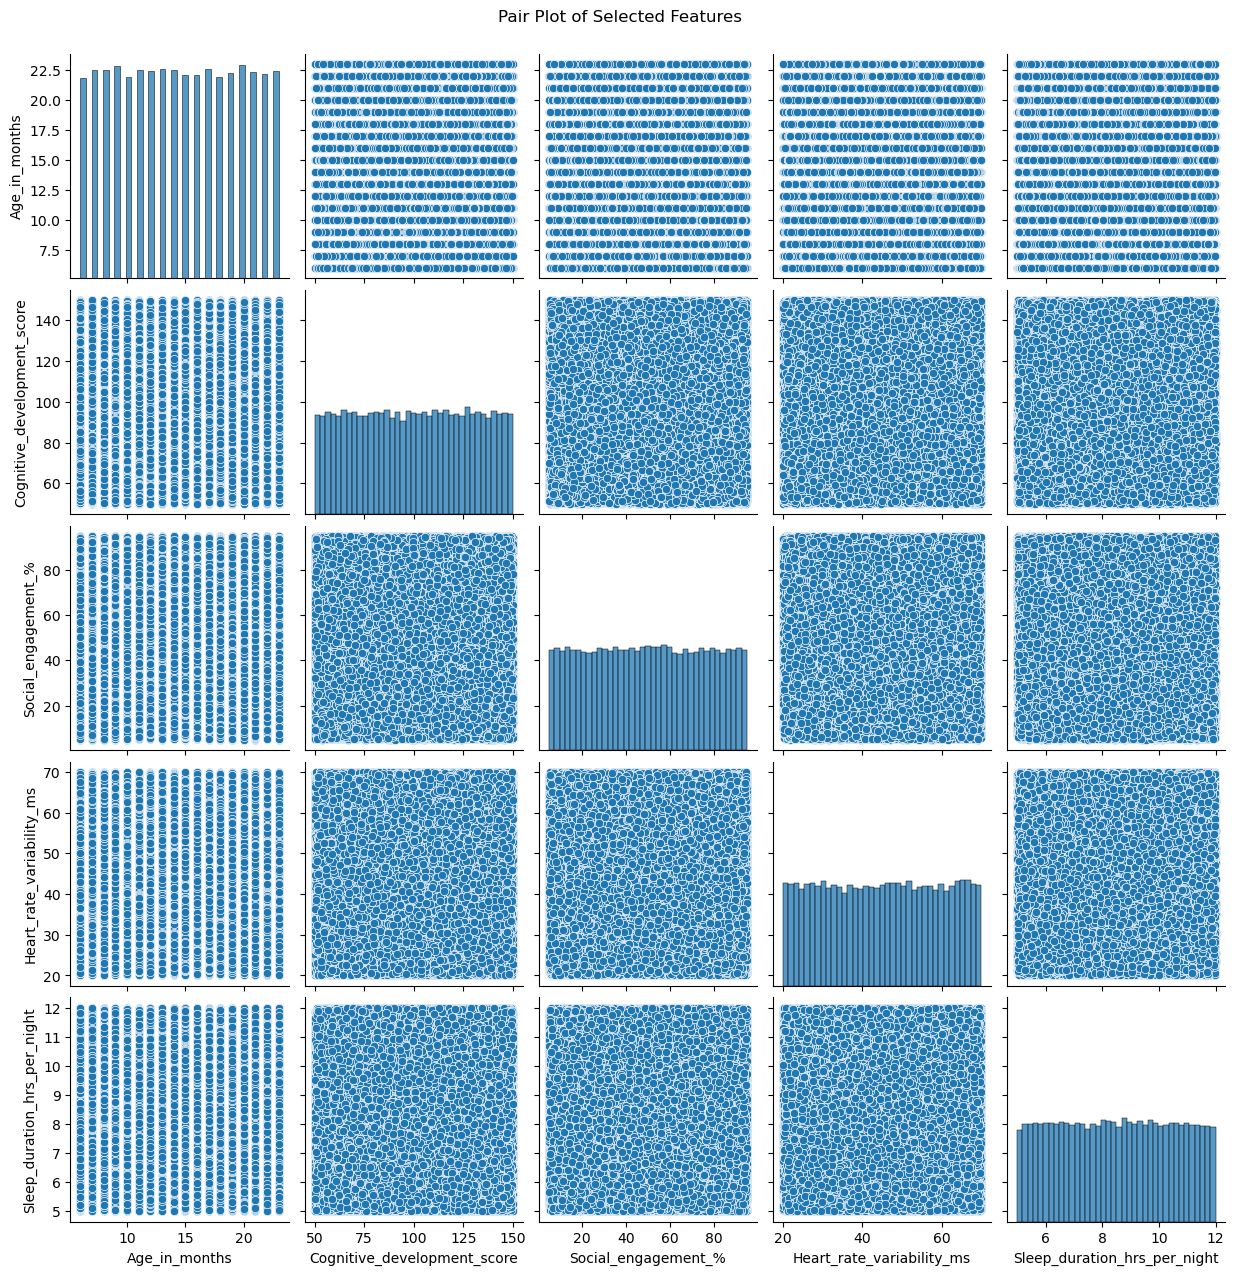

In [8]:
# Exploratory Data Analysis (EDA)

print("Generating pair plot of key features...")
plt.figure(figsize=(15, 15))
sns.pairplot(df[['Age_in_months', 'Cognitive_development_score', 'Social_engagement_%',
                 'Heart_rate_variability_ms', 'Sleep_duration_hrs_per_night']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

**Interpretation**:

**Absence of Strong Linear Relationships**:
 There are no visible strong linear connections between the scatter points of the variables. This suggests that more intricate modeling techniques may be required to account for the variety in the data, as simple linear connections might not be sufficient.

**Uniform Distribution of Features**:
- **Age_in_months**: The data is well-distributed across the observed age range (7.5 to 22.5 months), ensuring representation of all age groups.
- **Cognitive_development_score**: Individual differences in cognitive development are reflected in the evenly distributed scores.
- **Social_engagement_%**: There are no obvious clusters or outliers in the distribution, which is comparatively uniform and shows variety in social engagement.
- **Heart_rate_variability_ms**: Shows a consistent spread, indicating that the sample's heart rate variability is dispersed equally.
- **Sleep_duration_hrs_per_night**: The majority of the results fall within a typical range, indicating some stability in the amount of sleep.

**Absence of Outliers**:
 The visualizations show no notable outliers, allowing for reliable model training without requiring a lot of pre-processing for extreme values.

**Feature Independence**:
 Since there are no obvious patterns or dependencies in the variables' pairwise relationships, they seem to be mainly independent. Some machine learning techniques that depend on feature interactions might be put to the test by this independence.

**Potential for Non-linear Relationships**: 
The lack of distinct patterns raises the prospect of non-linear relationships between features, which may be investigated with the aid of neural networks, XGBoost, Random Forest, or other algorithms.


Generating correlation heatmap...


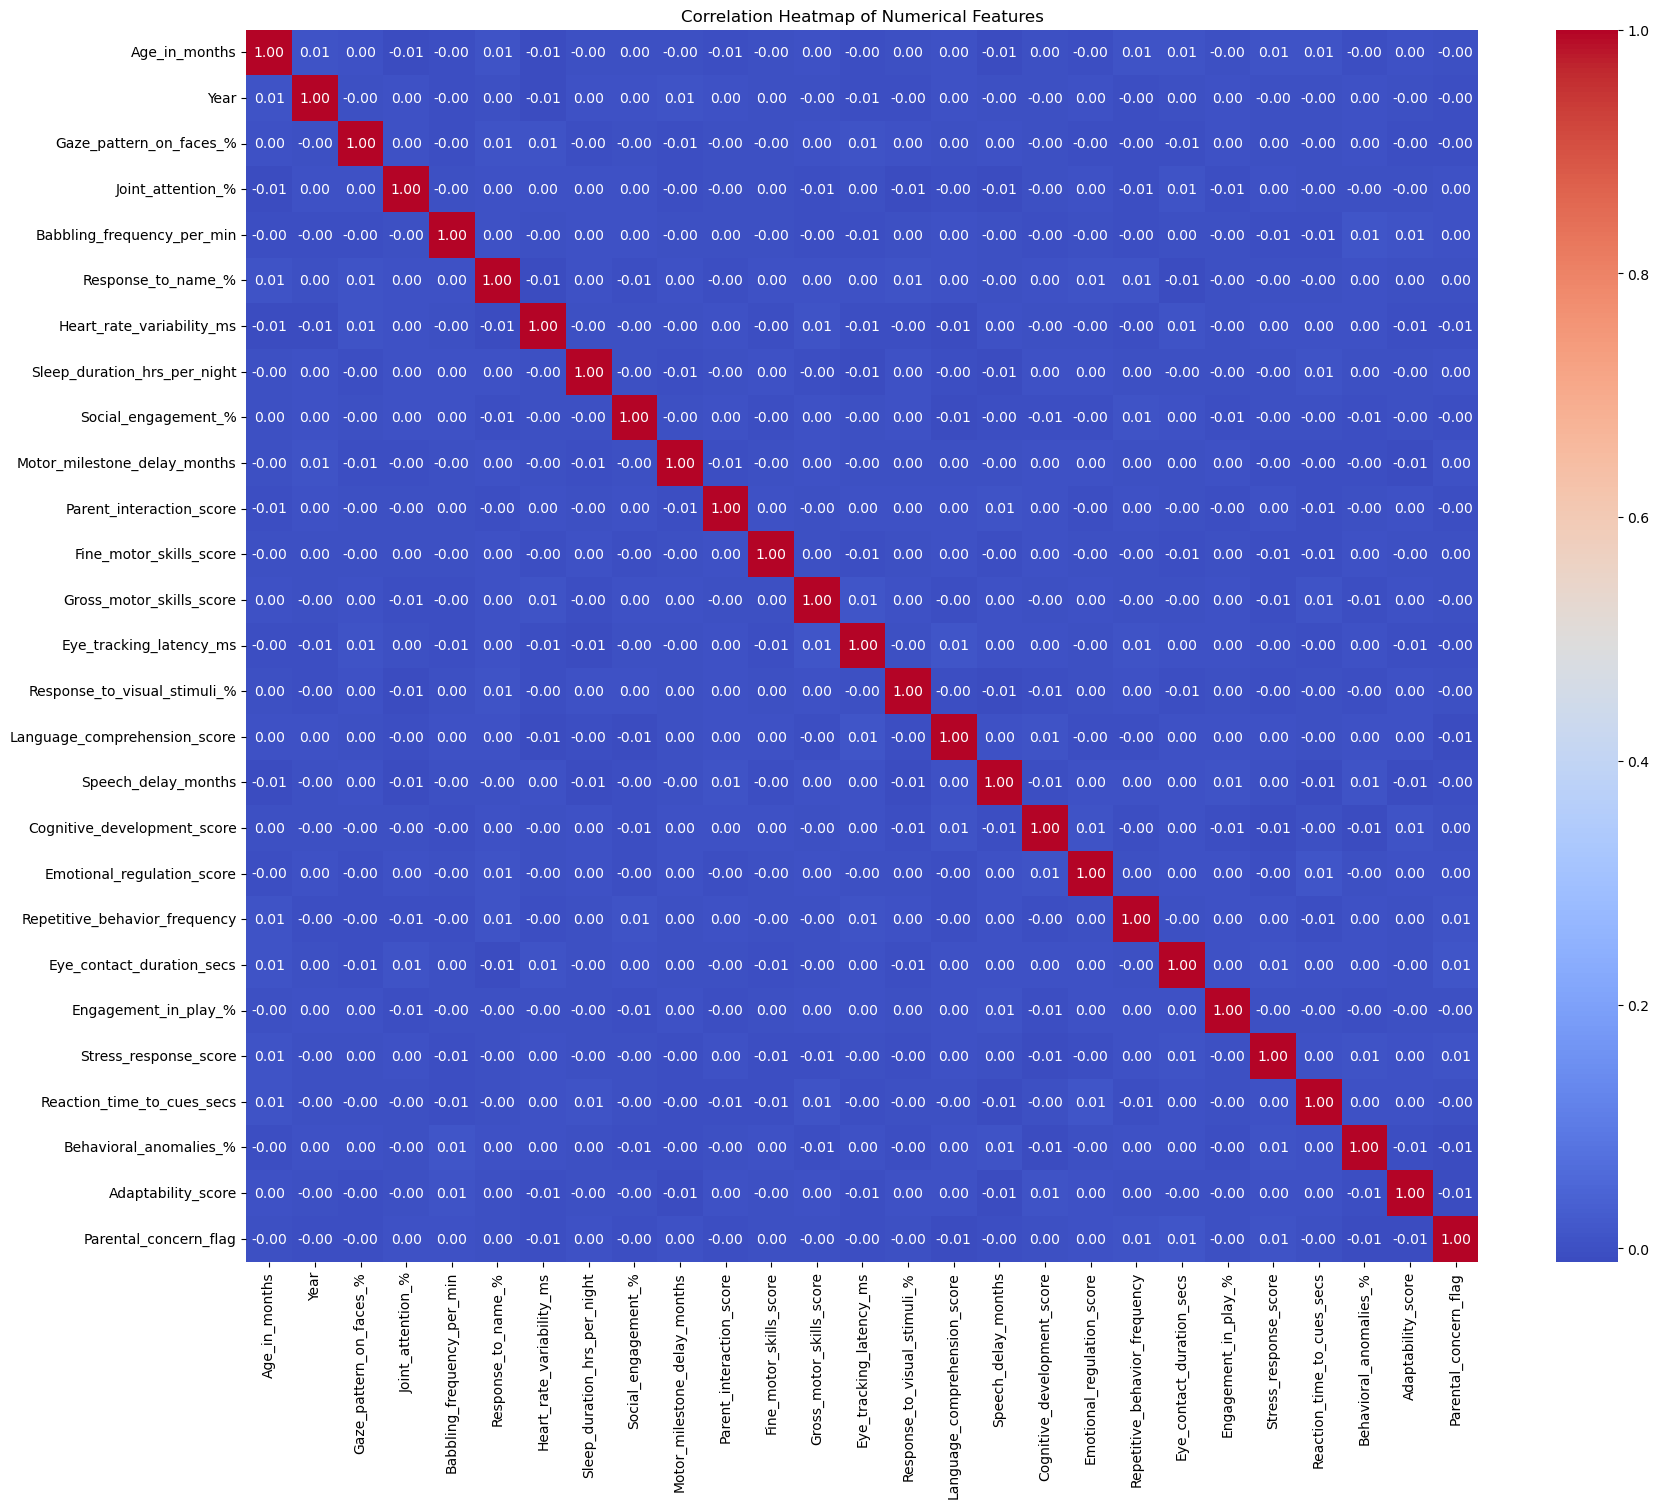

In [ ]:
# Generate a correlation heatmap for numerical features
# This provides insights into the relationships between numerical variables, helping identify multicollinearity and feature dependencies.
print("\nGenerating correlation heatmap...")

numeric_columns = df.select_dtypes(include=['number']) 
numeric_columns = numeric_columns.drop(columns=['ID'])  # Exclude 'ID' column 

correlation_matrix = numeric_columns.corr()  # Compute the correlation matrix for numeric features

plt.figure(figsize=(20, 16)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)  
plt.title('Correlation Heatmap of Numerical Features')  
plt.show() 

**Interpretation**:
- **Low Correlation Across Features**: The majority of correlations between numerical features are close to 0, indicating weak linear relationships. This suggests that the features are largely independent, reducing the risk of multicollinearity.
- **Diagonal Correlation of 1.0**: The diagonal values are all 1.0, as each feature is perfectly correlated with itself.
- **Absence of Strong Correlations**: No pairs of features show strong positive or negative correlations. This indicates that no two features are strongly redundant, making all features potentially valuable for the model.

In [10]:
#  Age-based Analysis
print("\nCalculating age-based statistics...")
# Group by Age_in_months and calculate means
grouped_means = numeric_columns.groupby(df['Age_in_months']).mean()
print("\nAge-grouped means for numeric features:")
print(grouped_means)


Calculating age-based statistics...

Age-grouped means for numeric features:
               Age_in_months      Year  Gaze_pattern_on_faces_%  \
Age_in_months                                                     
6                        6.0  3.031923                49.885854   
7                        7.0  2.967477                50.000797   
8                        8.0  2.963890                50.157652   
9                        9.0  2.967505                49.934313   
10                      10.0  2.915712                50.091000   
11                      11.0  3.043261                49.707272   
12                      12.0  2.962419                50.608661   
13                      13.0  3.015275                49.505737   
14                      14.0  2.993922                49.482014   
15                      15.0  3.013553                49.656138   
16                      16.0  2.979113                49.696873   
17                      17.0  3.034030             

The mean within the group is calculated based on Age_in_months. From the output, we can see that the data is grouped by age from 6 months to 23 months. Gaze_pattern_on_faces_% fluctuates in different groups with the change of age, indicating that this feature is affected by age.


Age-grouped modes for categorical features:
              Sensory_sensitivity_level Auditory_sensitivity_level
Age_in_months                                                     
6                                  High                       High
7                                  High                       High
8                                Normal                        Low
9                                   Low                     Normal
10                                  Low                     Normal
11                               Normal                       High
12                                  Low                       High
13                               Normal                        Low
14                                 High                     Normal
15                                  Low                     Normal
16                                  Low                       High
17                                  Low                       High
18               

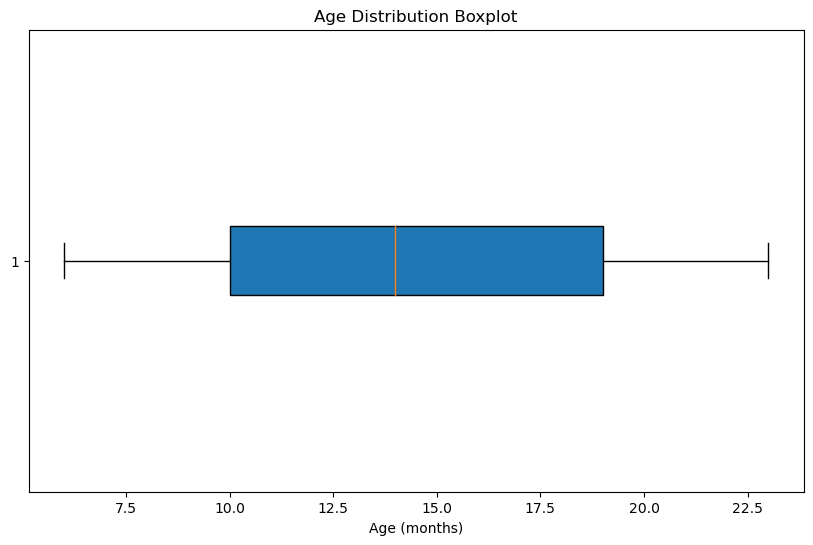

In [11]:
categorical_columns = df.select_dtypes(include=['object'])

#  the most frequent category  for each categorical feature grouped by 'Age_in_months'
print("\nAge-grouped modes for categorical features:")
print(categorical_columns.groupby(df['Age_in_months']).agg(lambda x: x.mode()[0]))

plt.figure(figsize=(10, 6))
plt.boxplot(df['Age_in_months'], vert=False, patch_artist=True) 
plt.title('Age Distribution Boxplot')  
plt.xlabel('Age (months)') 
plt.show()

The overall distribution is concentrated between 10 and 20 months old, and this age group is the main concentration range of samples

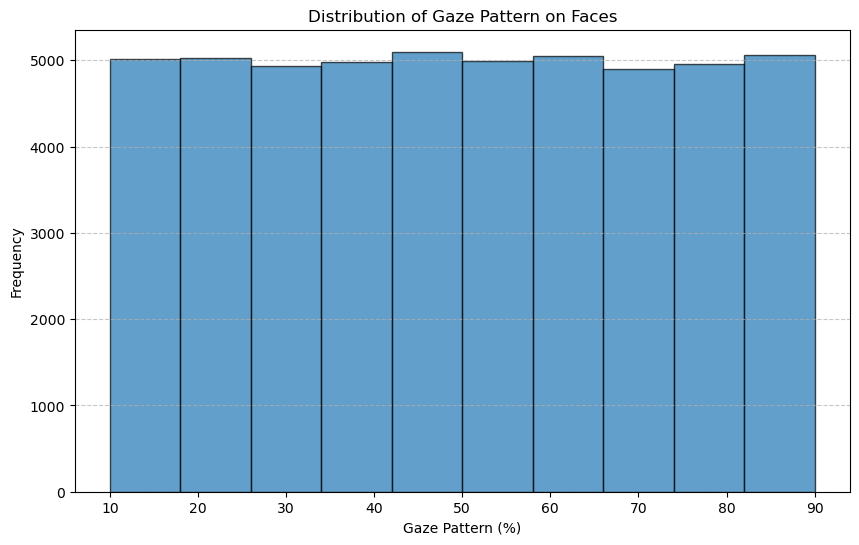

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Gaze_pattern_on_faces_%'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Gaze Pattern on Faces')
plt.xlabel('Gaze Pattern (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the histogram of Gaze_pattern_on_faces_%, we can see that the data distribution is relatively uniform, and the percentage range from 10% to 90% is almost evenly distributed, with no obvious concentration or deviation. This shows that the frequency of the gaze face pattern shows a relatively uniform distribution trend in the entire sample.

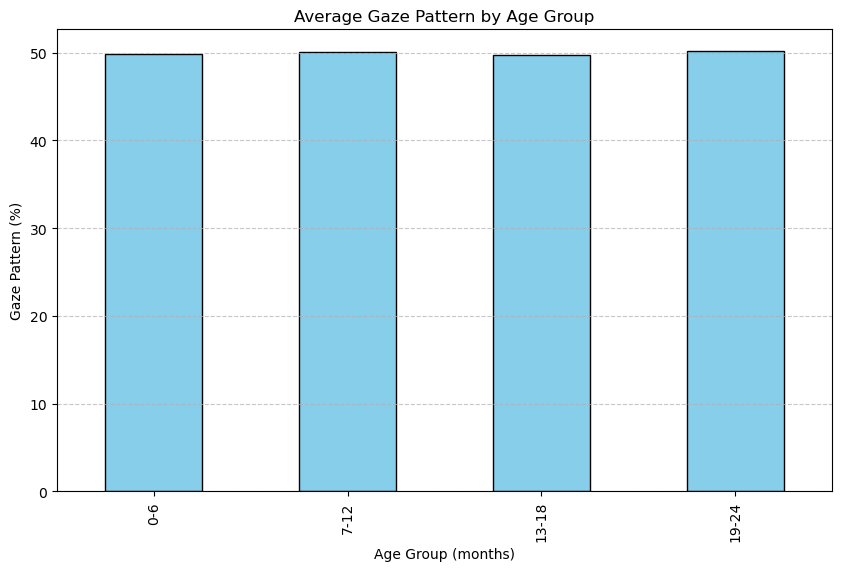

In [13]:
age_bins = pd.cut(df['Age_in_months'], bins=[0, 6, 12, 18, 24], 
                 labels=['0-6', '7-12', '13-18', '19-24'])

gaze_means = df.groupby(age_bins)['Gaze_pattern_on_faces_%'].mean()
plt.figure(figsize=(10, 6))
gaze_means.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Gaze Pattern by Age Group')
plt.xlabel('Age Group (months)')
plt.ylabel('Gaze Pattern (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The mean values ​​of facial gaze patterns for the different age groups (0-6 months, 7-12 months, 13-18 months, and 19-24 months) were very similar, with no clear trend.

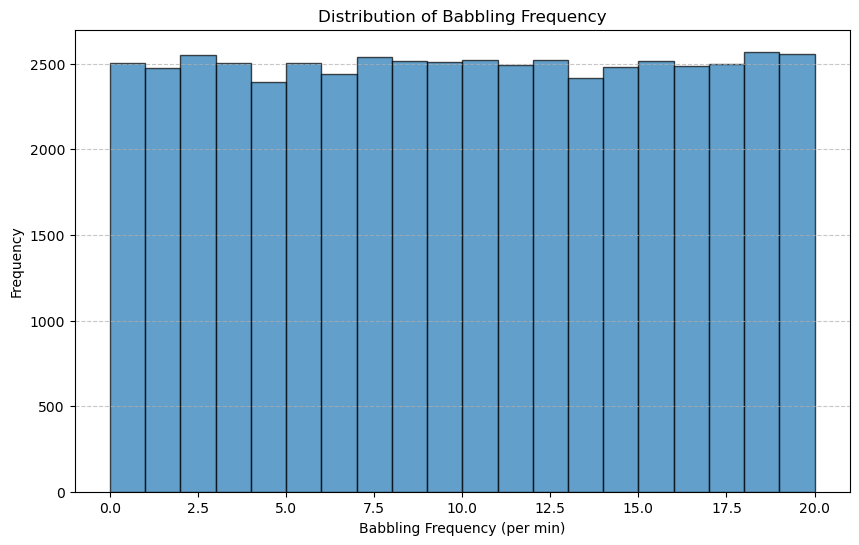

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['Babbling_frequency_per_min'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Babbling Frequency')
plt.xlabel('Babbling Frequency (per min)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution of infant babbling frequency per minute is relatively uniform, ranging from nearly 0 to 20 times. The frequency distribution intervals are highly close, and there is no obvious extreme high or low phenomenon.

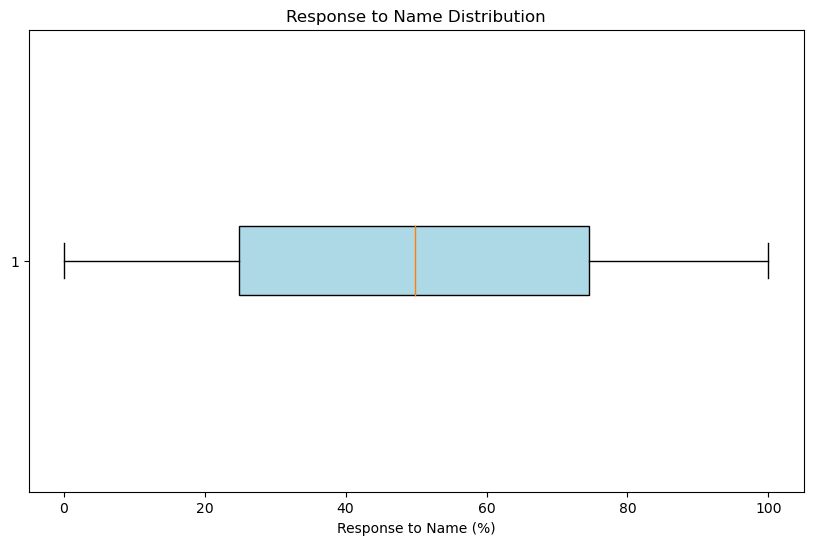

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Response_to_name_%'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title('Response to Name Distribution')
plt.xlabel('Response to Name (%)')
plt.show()

The distribution of infants' Response to Name (%) was concentrated between 40% and 70%.

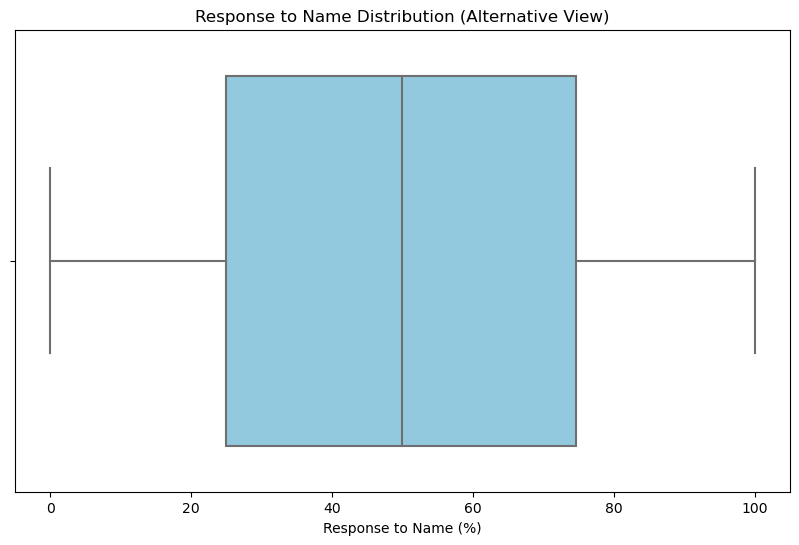

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Response_to_name_%'], color='skyblue')
plt.title('Response to Name Distribution (Alternative View)')
plt.xlabel('Response to Name (%)')
plt.show()

The distribution of the percentages of babies' responses to names ranged from 0 to 100, and was fairly even, with the median being around 50%.

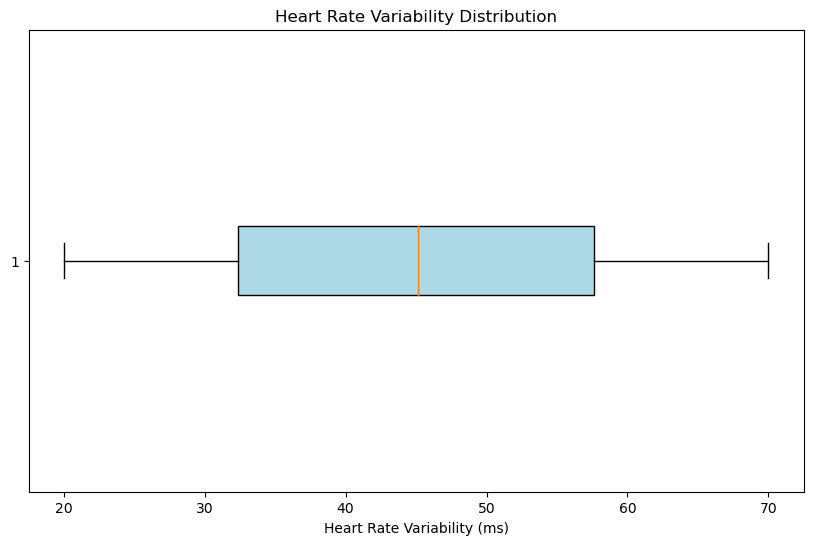

In [17]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Heart_rate_variability_ms'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title('Heart Rate Variability Distribution')
plt.xlabel('Heart Rate Variability (ms)')
plt.show()

The distribution of infant heart rate variability is between 20 and 70 ms, with most of the data concentrated in the range of 40 to 55 ms.

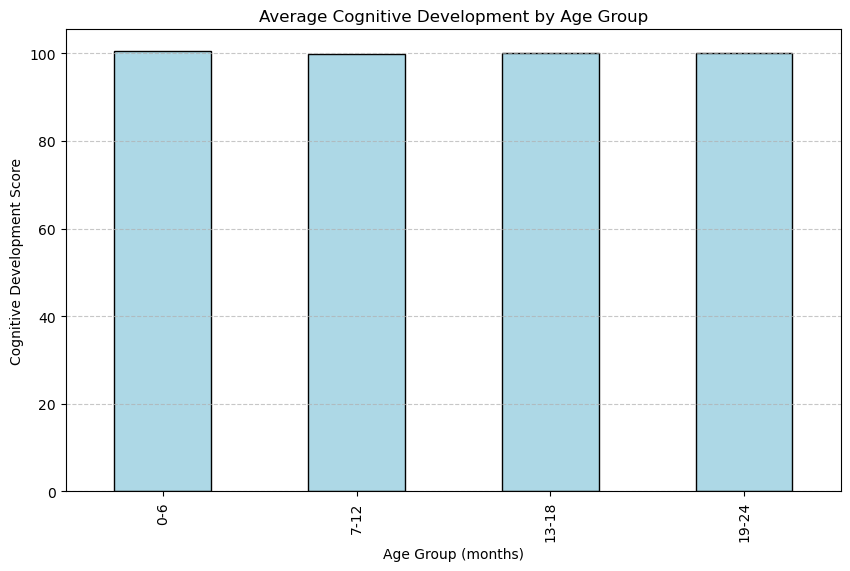

In [18]:
cognitive_means = df.groupby(age_bins)['Cognitive_development_score'].mean()
plt.figure(figsize=(10, 6))
cognitive_means.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Cognitive Development by Age Group')
plt.xlabel('Age Group (months)')
plt.ylabel('Cognitive Development Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The scores remain uniform across all age groups.
This uniformity implies that age groups do not significantly influence cognitive development in the given data.

**Trend Analysis Interpretation for Each Graph**


Generating trend analysis plots...


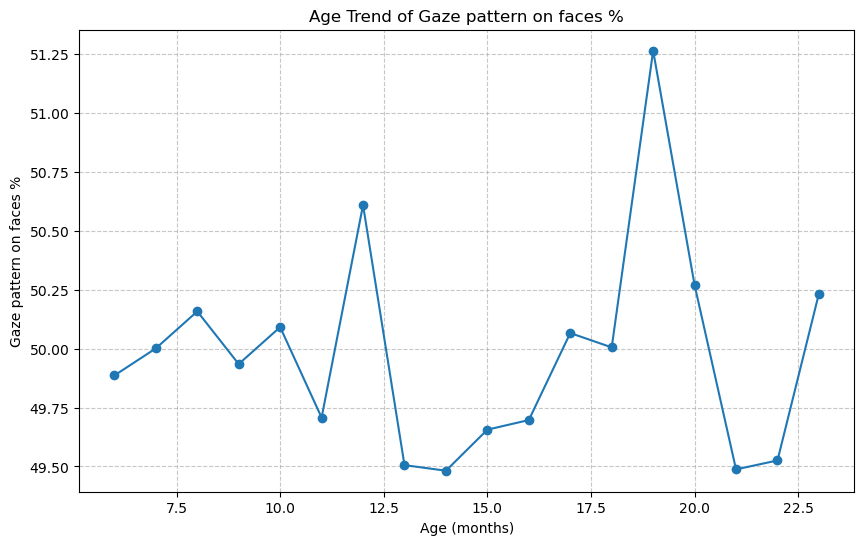

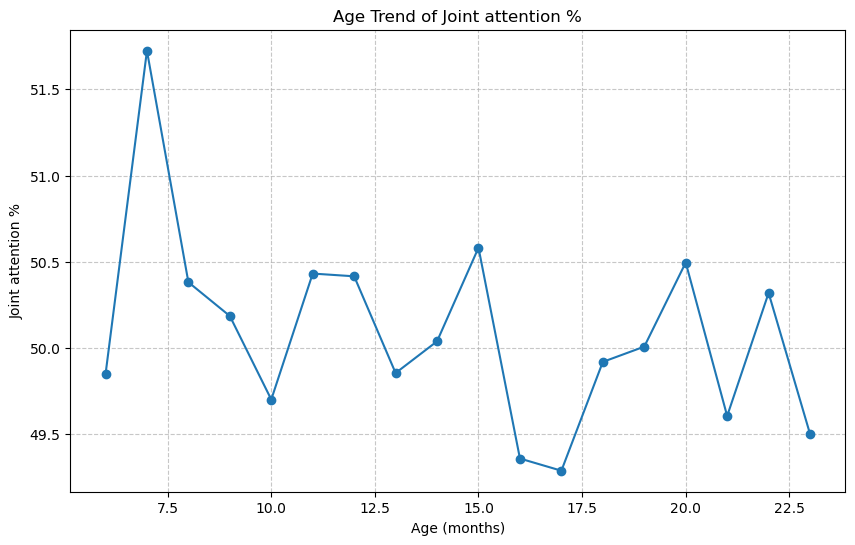

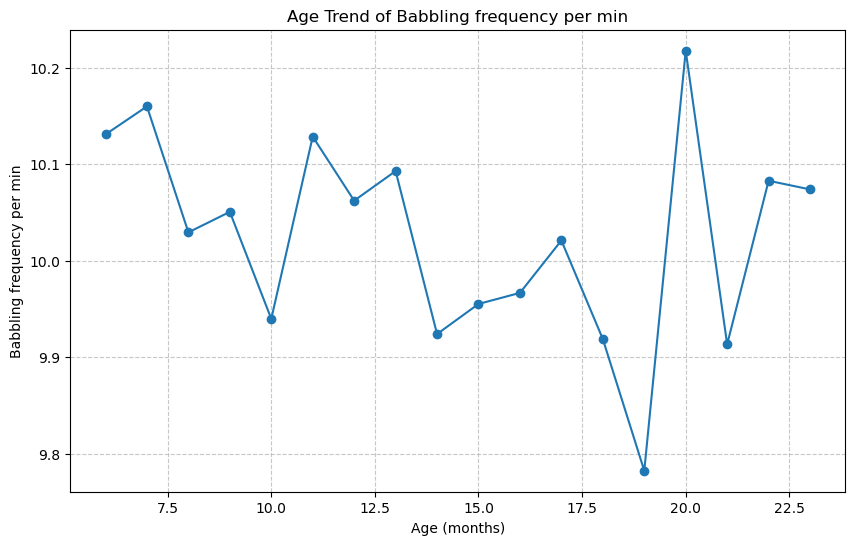

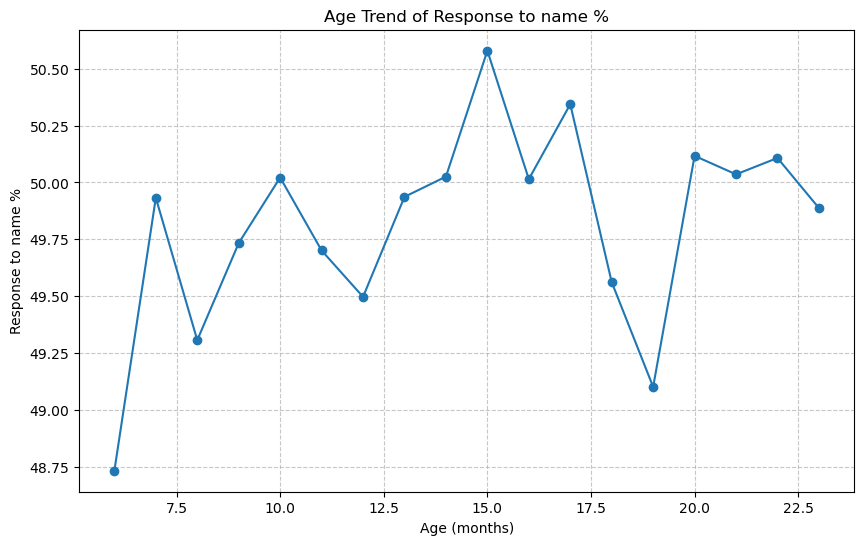

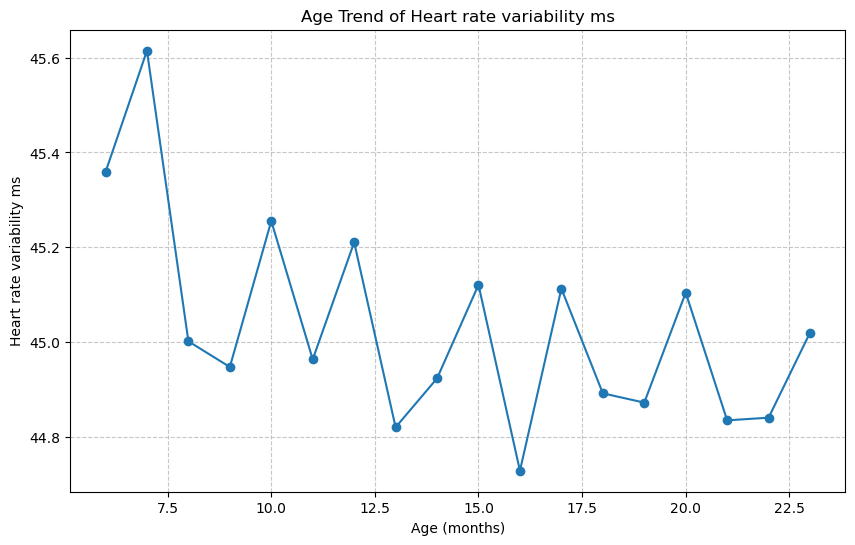

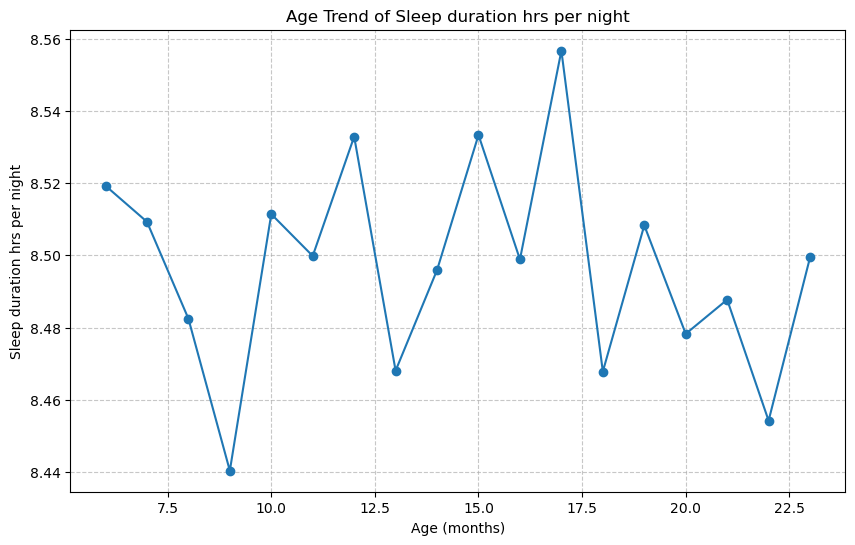

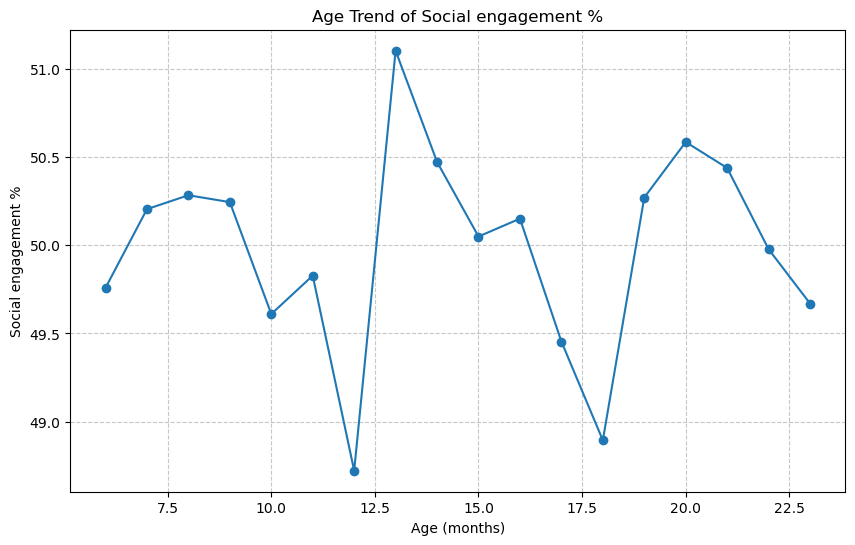

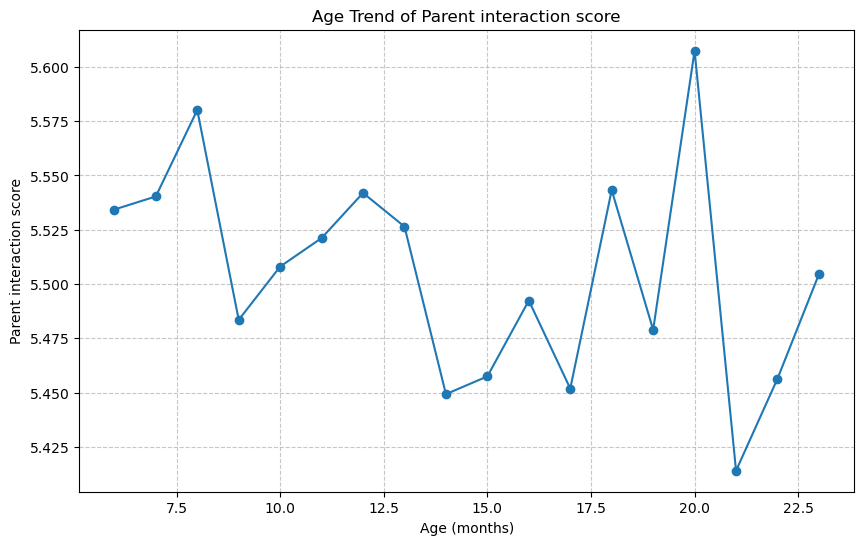

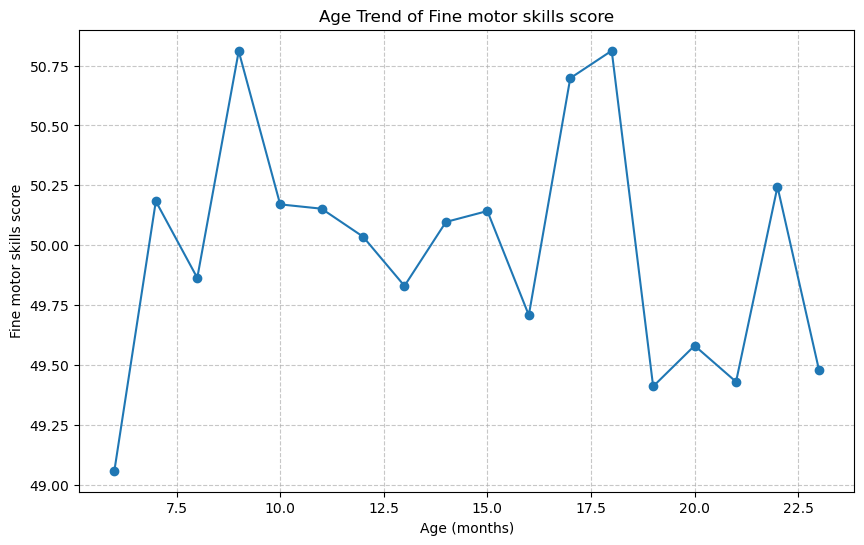

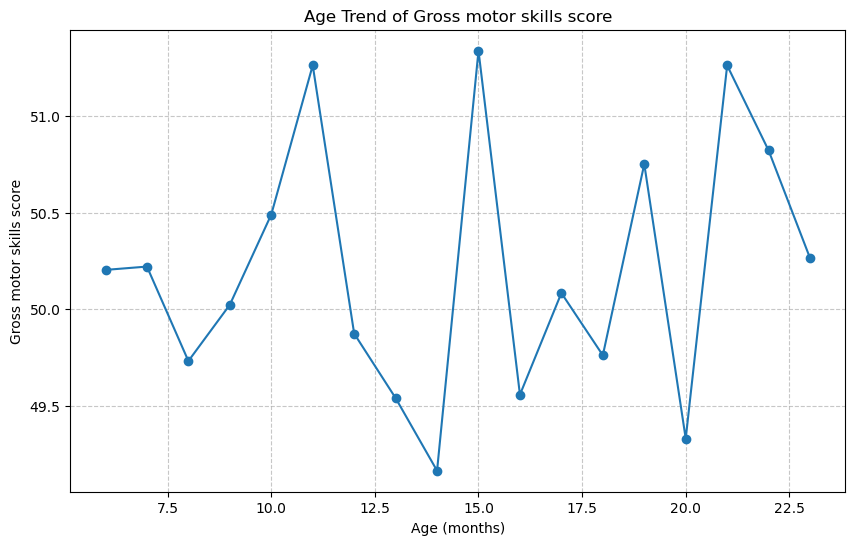

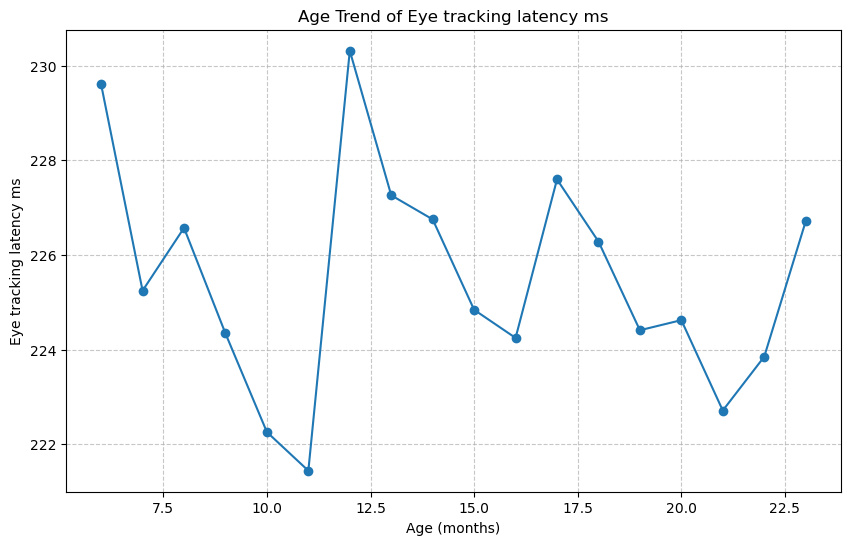

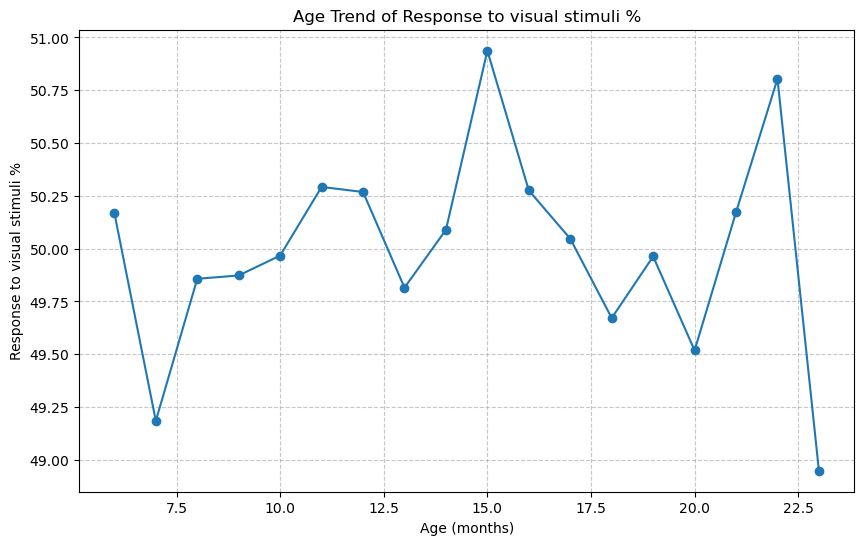

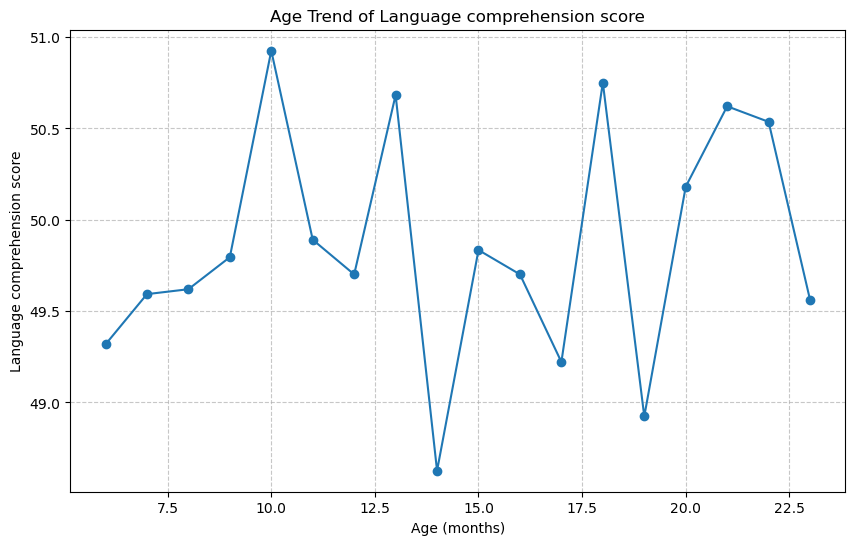

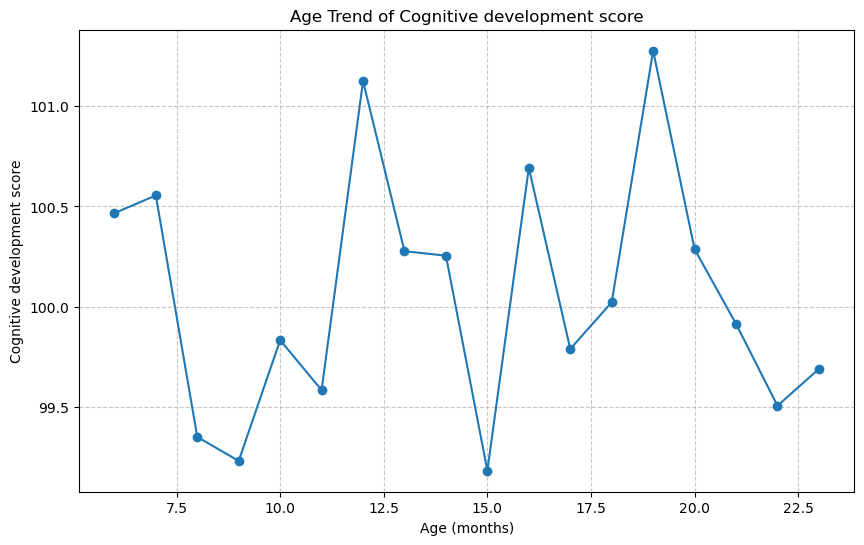

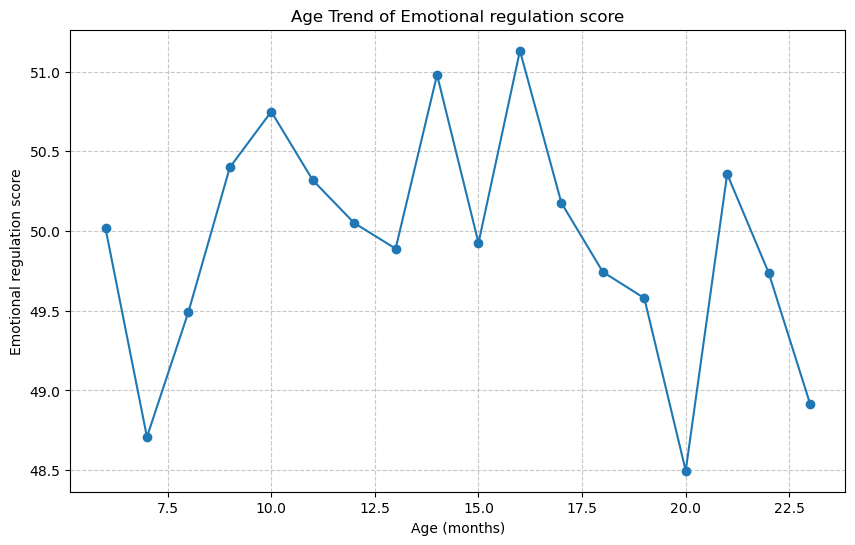

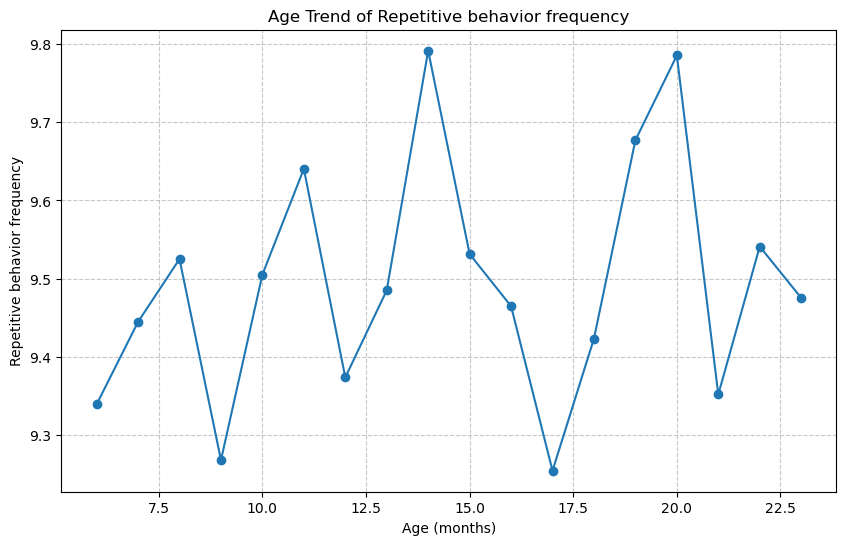

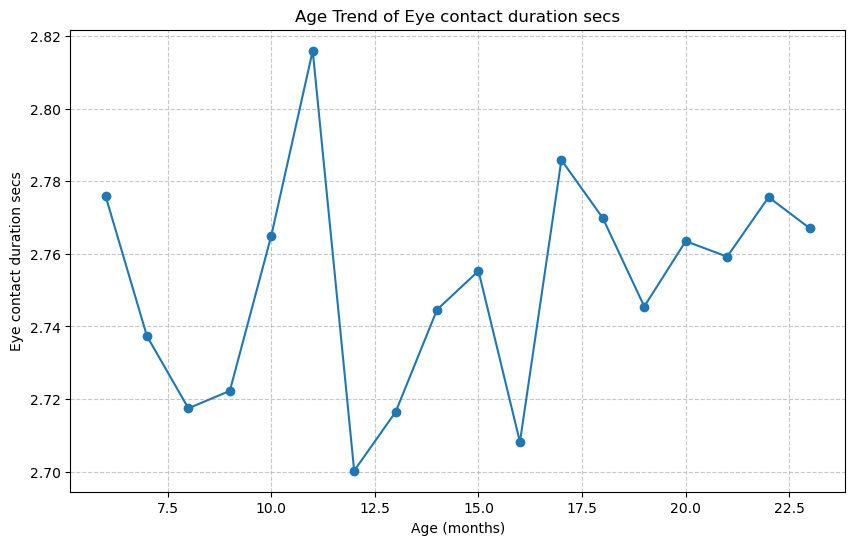

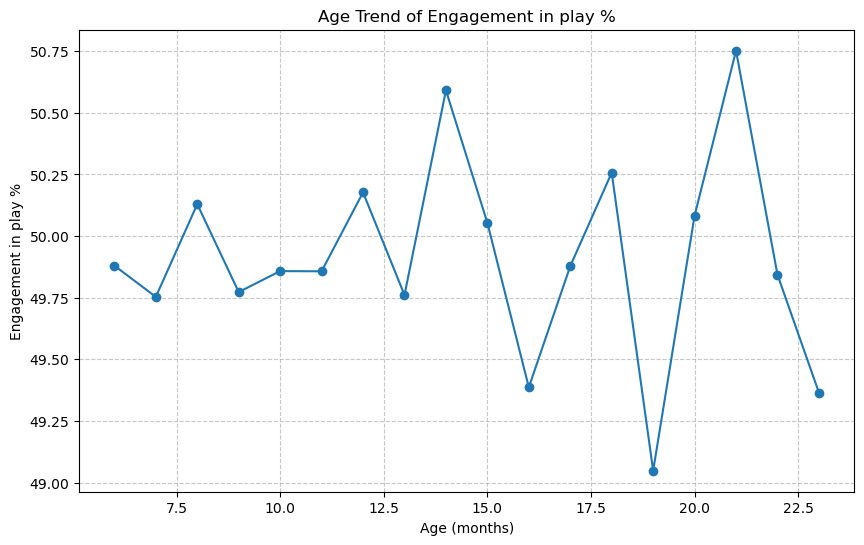

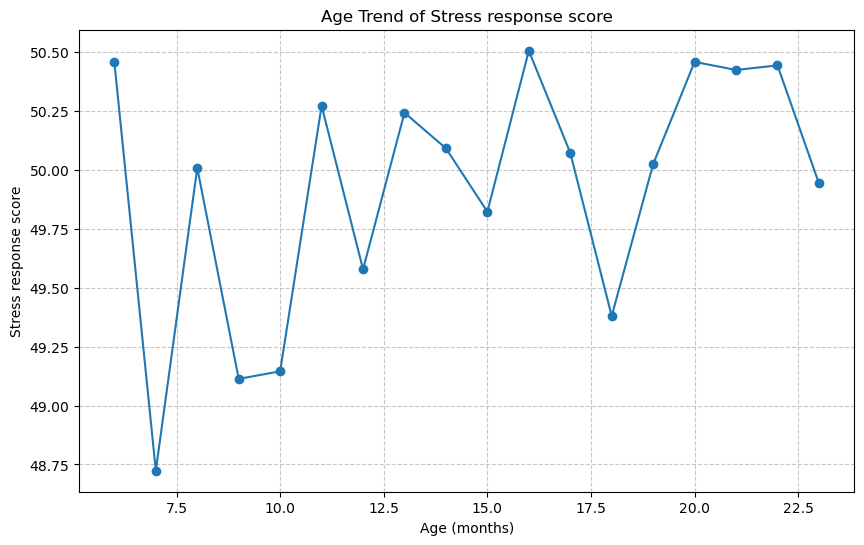

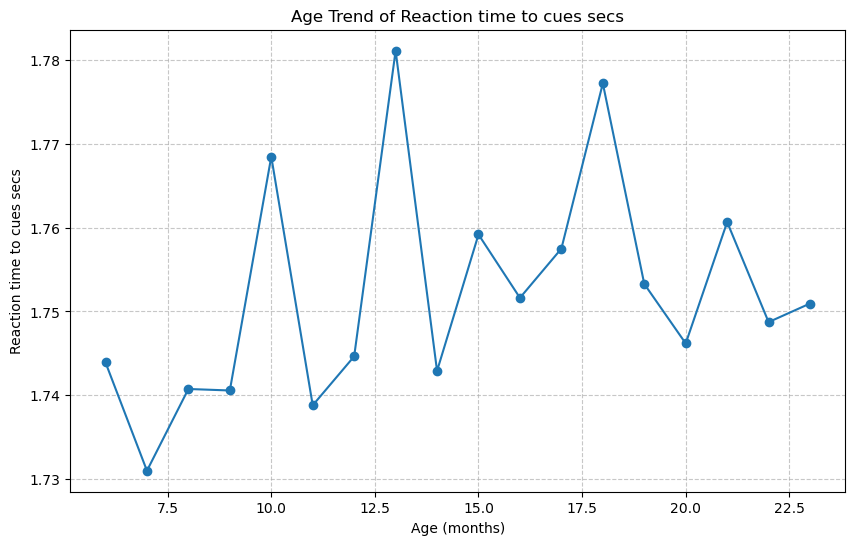

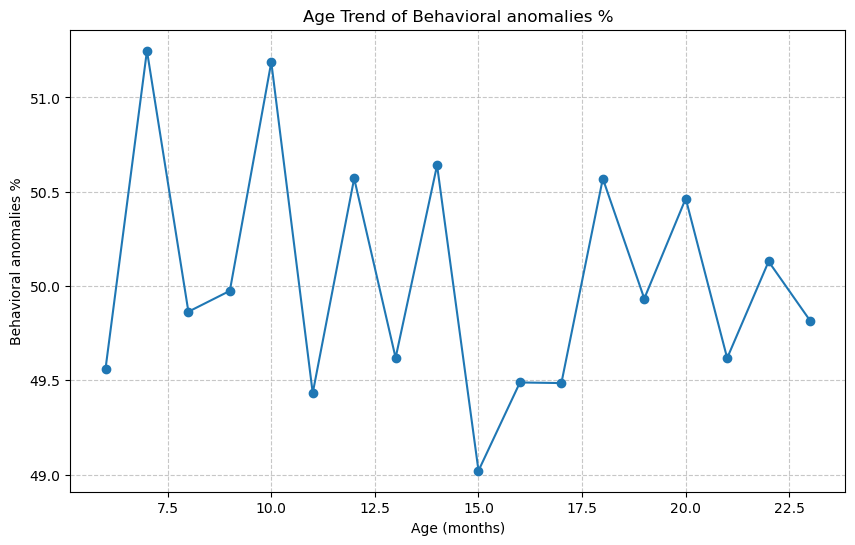

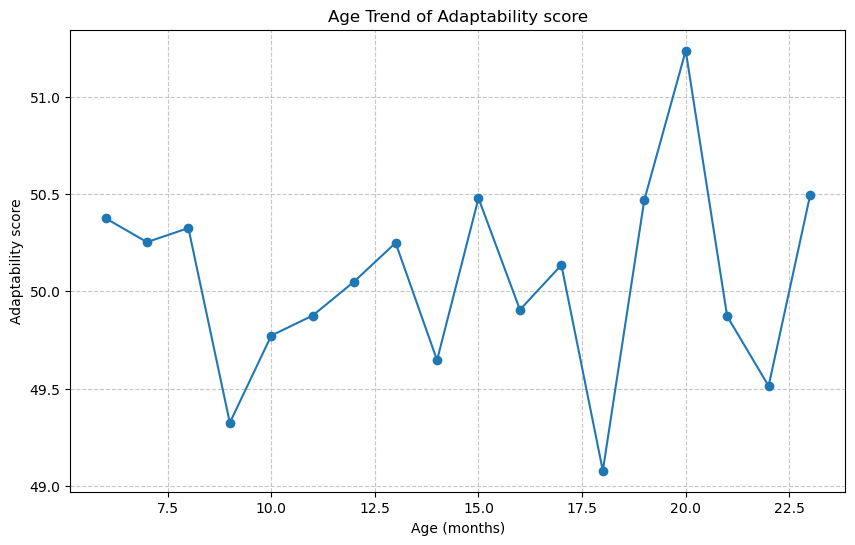

In [19]:
print("\nGenerating trend analysis plots...")
columns_to_plot = [
    'Gaze_pattern_on_faces_%', 'Joint_attention_%', 'Babbling_frequency_per_min',
    'Response_to_name_%', 'Heart_rate_variability_ms', 'Sleep_duration_hrs_per_night',
    'Social_engagement_%', 'Parent_interaction_score', 'Fine_motor_skills_score',
    'Gross_motor_skills_score', 'Eye_tracking_latency_ms', 'Response_to_visual_stimuli_%',
    'Language_comprehension_score', 'Cognitive_development_score', 'Emotional_regulation_score',
    'Repetitive_behavior_frequency', 'Eye_contact_duration_secs', 'Engagement_in_play_%',
    'Stress_response_score', 'Reaction_time_to_cues_secs', 'Behavioral_anomalies_%',
    'Adaptability_score'
]

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df.groupby('Age_in_months')[col].mean(), marker='o')
    plt.title(f'Age Trend of {col.replace("_", " ")}')
    plt.xlabel('Age (months)')
    plt.ylabel(col.replace("_", " "))
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

**Interpretation**:

- Overall Development Stability: Most metrics reflect a stable trajectory over time, with natural fluctuations typical of child development.

- Milestone Indications: Peaks in certain trends, such as motor skills and babbling frequency, may align with age-specific developmental milestones.

- Developmental Variability: The fluctuations in emotional regulation, behavioral anomalies, and adaptability highlight individual differences and external influences.

- Holistic Growth: The consistent progress across cognitive, motor, and social domains indicates healthy, balanced development.

In [20]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


There are no missing values ​​in the dataset

---------------------------------------------------------------------------------

## 3. Feature encoding and smote

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

#  target variable
target_variable = 'Parental_concern_flag'

# Category mappings for categorical features
category_mappings = {
    'Sensory_sensitivity_level': {'Low': 0, 'Normal': 1, 'High': 2},
    'Auditory_sensitivity_level': {'Low': 0, 'Normal': 1, 'High': 2}
}

# Map categorical features to numerical values
for col, mapping in category_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

if target_variable not in df.columns:
    raise KeyError(f"The target variable '{target_variable}' is not in the dataset.")

X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target variable

print("Feature dataset shape:", X.shape)
print("Target dataset shape:", y.shape)

Feature dataset shape: (50000, 29)
Target dataset shape: (50000,)


In [22]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  
)


print("Training target distribution:")
print(y_train.value_counts())
print("Test target distribution:")
print(y_test.value_counts())

Training target distribution:
0    32071
1     7929
Name: Parental_concern_flag, dtype: int64
Test target distribution:
0    8018
1    1982
Name: Parental_concern_flag, dtype: int64


In [23]:
# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Apply SMOTE to the testing set as well
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

print("After SMOTE - Training dataset shape:", X_train_resampled.shape)
print("After SMOTE - Training target distribution:")
print(y_train_resampled.value_counts())

print("After SMOTE - Test dataset shape:", X_test_resampled.shape)
print("After SMOTE - Test target distribution:")
print(y_test_resampled.value_counts())

After SMOTE - Training dataset shape: (64142, 29)
After SMOTE - Training target distribution:
0    32071
1    32071
Name: Parental_concern_flag, dtype: int64
After SMOTE - Test dataset shape: (16036, 29)
After SMOTE - Test target distribution:
0    8018
1    8018
Name: Parental_concern_flag, dtype: int64


---------------------------------------------------------------------------------

## 4. Model building

Use the processed balanced dataset

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(random_state=42)

# Define parameter grid for hyperparameter tuning 
param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the resampled training data (after applying SMOTE)
grid_search_log_reg.fit(X_train_resampled, y_train_resampled)

# Get the best estimator from grid search
best_log_reg = grid_search_log_reg.best_estimator_

# Predict on the test data using the best logistic regression model
y_pred_log_reg = best_log_reg.predict(X_test_resampled)

y_pred_proba_log_reg = best_log_reg.predict_proba(X_test_resampled)[:, 1]

accuracy_log_reg = accuracy_score(y_test_resampled, y_pred_log_reg)  # Accuracy
f1_score_log_reg = f1_score(y_test_resampled, y_pred_log_reg)  # F1 Score
roc_auc_log_reg = roc_auc_score(y_test_resampled, y_pred_proba_log_reg)  # ROC AUC Score

with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

print("Logistic Regression")
print(f"Accuracy: {accuracy_log_reg:.4f}")  
print(f"F1 Score: {f1_score_log_reg:.4f}")  
print(f"ROC AUC: {roc_auc_log_reg:.4f}")  
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_log_reg)) 

/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nick/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Logistic Regression
Accuracy: 0.6058
F1 Score: 0.6075
ROC AUC: 0.6458
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60      8018
           1       0.60      0.61      0.61      8018

    accuracy                           0.61     16036
   macro avg       0.61      0.61      0.61     16036
weighted avg       0.61      0.61      0.61     16036



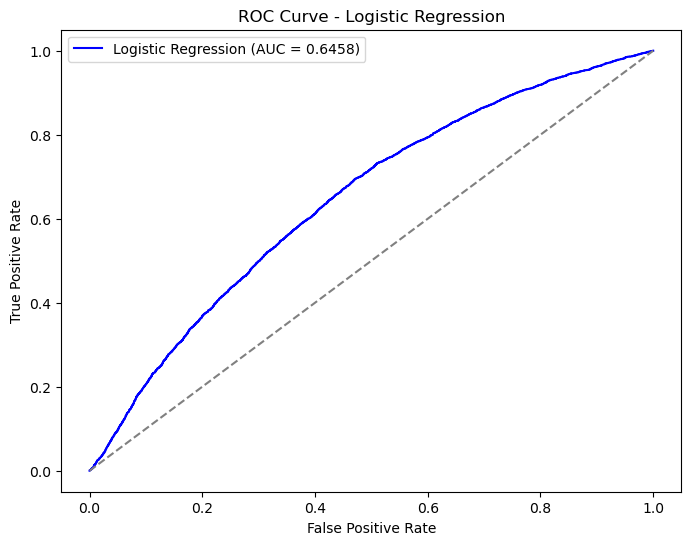

In [25]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"Logistic Regression (AUC = {roc_auc_log_reg:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

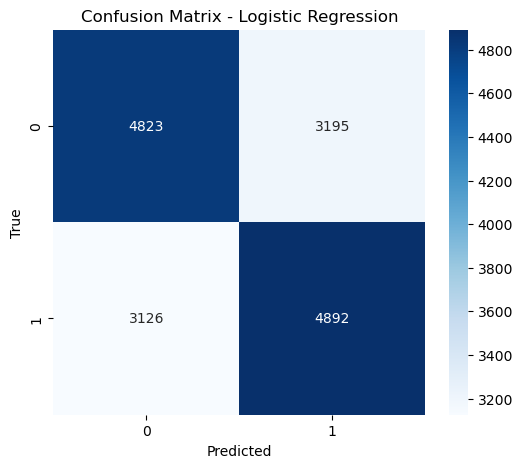

In [26]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_log_reg.classes_, yticklabels=best_log_reg.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The Accuracy is 60.58%, indicating that 60.58% of the predictions in the test set are correct.
The F1 Score is 60.75%, which combines the comprehensive indicators of precision and recall. The model's performance in the two categories is relatively balanced.
ROC AUC is 64.58%

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100],  
    'max_depth': [10, 20],     
    'min_samples_split': [2]    
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)  

best_rf = grid_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test_resampled)
y_pred_proba_rf = best_rf.predict_proba(X_test_resampled)[:, 1] 

#  model performance
accuracy_rf = accuracy_score(y_test_resampled, y_pred_rf) 
f1_score_rf = f1_score(y_test_resampled, y_pred_rf)        
roc_auc_rf = roc_auc_score(y_test_resampled, y_pred_proba_rf)  

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

print("Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_score_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_rf))

Random Forest
Accuracy: 0.7325
F1 Score: 0.7149
ROC AUC: 0.7911
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      8018
           1       0.77      0.67      0.71      8018

    accuracy                           0.73     16036
   macro avg       0.74      0.73      0.73     16036
weighted avg       0.74      0.73      0.73     16036



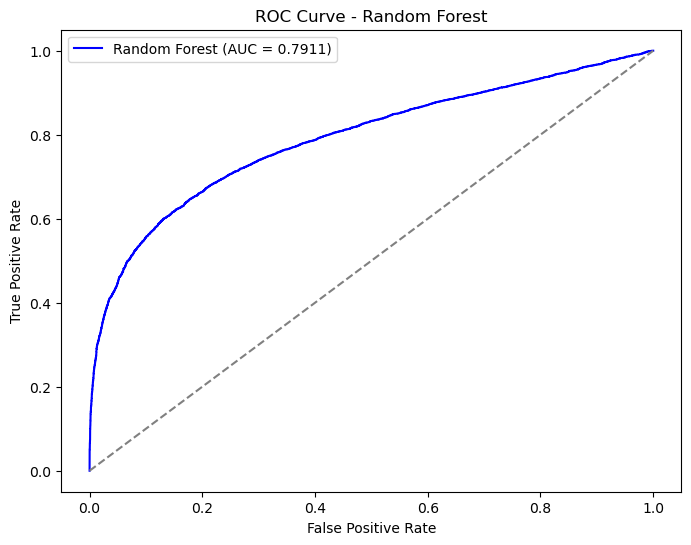

In [28]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

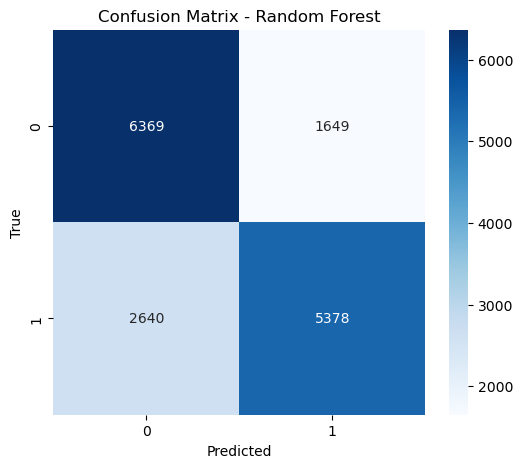

In [29]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf.classes_, yticklabels=best_rf.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The random forest model outperformed the logistic regression model with an accuracy of 73.25%, an F1 score of 71.49%, and an area under the ROC curve (AUC) of 79.11% on the test set.

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


xgb = XGBClassifier(random_state=42)
param_grid_xgb = {'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 10]}
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_resampled)
y_pred_proba_xgb = best_xgb.predict_proba(X_test_resampled)[:, 1]
accuracy_xgb = accuracy_score(y_test_resampled, y_pred_xgb)
f1_score_xgb = f1_score(y_test_resampled, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test_resampled, y_pred_proba_xgb)

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)

print("XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_score_xgb:.4f}")
print(f"ROC AUC: {roc_auc_xgb:.4f}")
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_xgb))

XGBoost
Accuracy: 0.7462
F1 Score: 0.7127
ROC AUC: 0.8062
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      8018
           1       0.82      0.63      0.71      8018

    accuracy                           0.75     16036
   macro avg       0.76      0.75      0.74     16036
weighted avg       0.76      0.75      0.74     16036



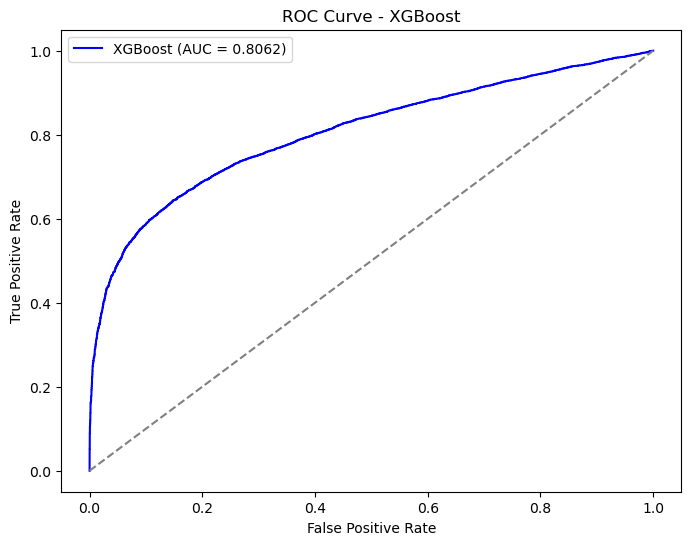

In [31]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"XGBoost (AUC = {roc_auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()


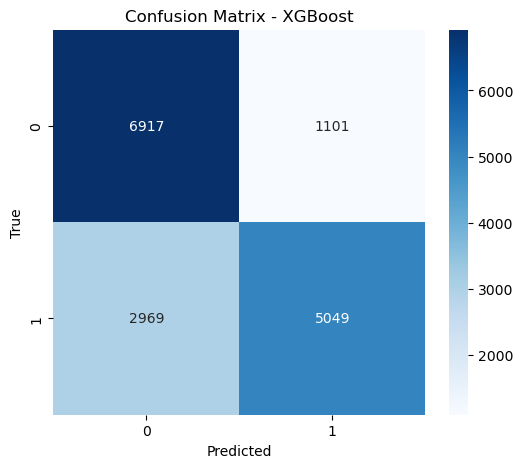

In [ ]:

conf_matrix = confusion_matrix(y_test_resampled, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_xgb.classes_, yticklabels=best_xgb.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The XGBoost model exhibited solid performance with an accuracy of **79.80%**, a **precision of 72.05%**, a **recall of 62.99%**, an **F1 score of 67.20%**, and an **AUC of 81.75%**, showcasing its effectiveness in balancing predictive power and robustness.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


knn = KNeighborsClassifier()

param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_resampled, y_train_resampled)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_resampled)
y_pred_proba_knn = best_knn.predict_proba(X_test_resampled)[:, 1]
accuracy_knn = accuracy_score(y_test_resampled, y_pred_knn)
f1_score_knn = f1_score(y_test_resampled, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test_resampled, y_pred_proba_knn)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)


print("K-Nearest Neighbors")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_score_knn:.4f}")
print(f"ROC AUC: {roc_auc_knn:.4f}")
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_knn))

K-Nearest Neighbors
Accuracy: 0.5392
F1 Score: 0.5587
ROC AUC: 0.5534
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      8018
           1       0.54      0.58      0.56      8018

    accuracy                           0.54     16036
   macro avg       0.54      0.54      0.54     16036
weighted avg       0.54      0.54      0.54     16036



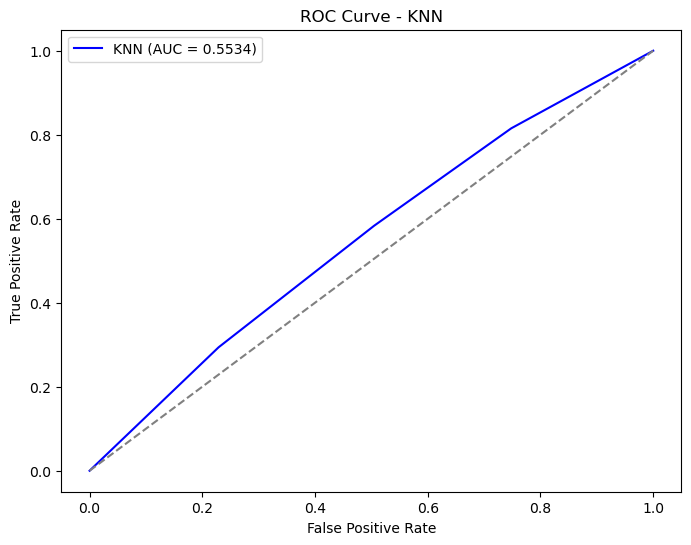

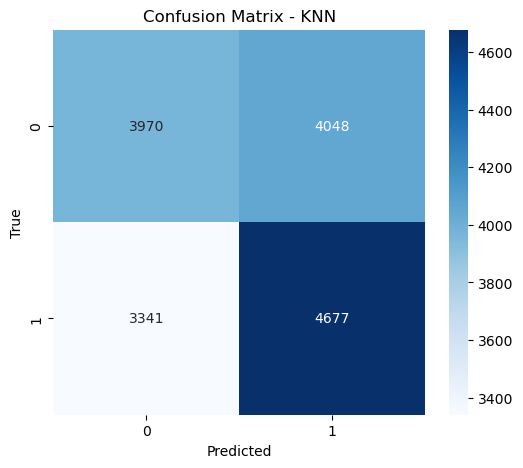

In [34]:

fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"KNN (AUC = {roc_auc_knn:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

conf_matrix = confusion_matrix(y_test_resampled, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



The KNN model achieved an accuracy of 54.33%, with a precision of 53.62%, a recall of 58.32%, an F1 score of 55.88%, and an AUC of 60.12%, reflecting moderate performance in balancing false positives and false negatives.

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

nb = GaussianNB()

param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_resampled, y_train_resampled)

best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test_resampled)
y_pred_proba_nb = best_nb.predict_proba(X_test_resampled)[:, 1]
accuracy_nb = accuracy_score(y_test_resampled, y_pred_nb)
f1_score_nb = f1_score(y_test_resampled, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test_resampled, y_pred_proba_nb)

with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(best_nb, f)

In [36]:
print("Naive Bayes")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"F1 Score: {f1_score_nb:.4f}")
print(f"ROC AUC: {roc_auc_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_nb))

Naive Bayes
Accuracy: 0.7231
F1 Score: 0.7289
ROC AUC: 0.8018
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      8018
           1       0.71      0.74      0.73      8018

    accuracy                           0.72     16036
   macro avg       0.72      0.72      0.72     16036
weighted avg       0.72      0.72      0.72     16036



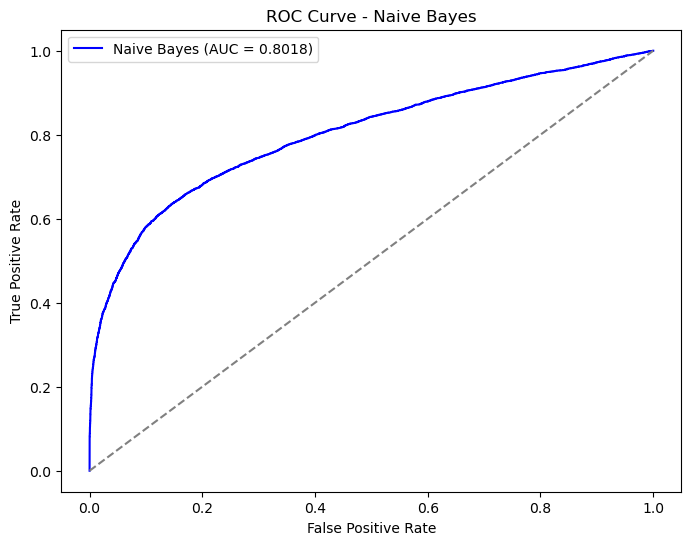

In [37]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"Naive Bayes (AUC = {roc_auc_nb:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

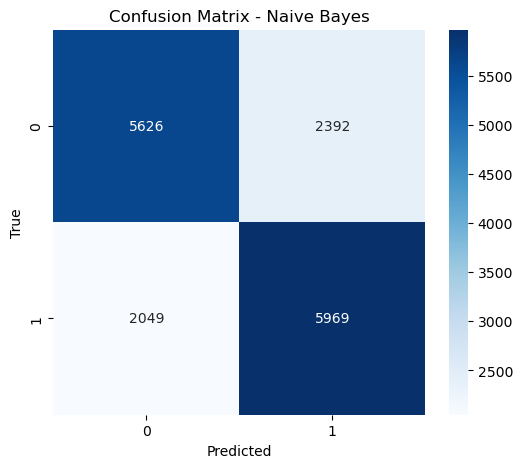

In [38]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_nb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_nb.classes_, yticklabels=best_nb.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The Naive Bayes model achieved an accuracy of **71.23%**, with a **precision of 71.38%**, a **recall of 74.43%**, an **F1 score of 72.87%**, and an **AUC of 78.56%**, demonstrating strong performance with a good balance between precision and recall.

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_resampled, y_train_resampled)

best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_resampled)
y_pred_proba_dt = best_dt.predict_proba(X_test_resampled)[:, 1]
accuracy_dt = accuracy_score(y_test_resampled, y_pred_dt)
f1_score_dt = f1_score(y_test_resampled, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test_resampled, y_pred_proba_dt)

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(best_dt, f)

print("Decision Tree")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score: {f1_score_dt:.4f}")
print(f"ROC AUC: {roc_auc_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test_resampled, y_pred_dt))


Decision Tree
Accuracy: 0.6391
F1 Score: 0.6320
ROC AUC: 0.6391
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      8018
           1       0.64      0.62      0.63      8018

    accuracy                           0.64     16036
   macro avg       0.64      0.64      0.64     16036
weighted avg       0.64      0.64      0.64     16036



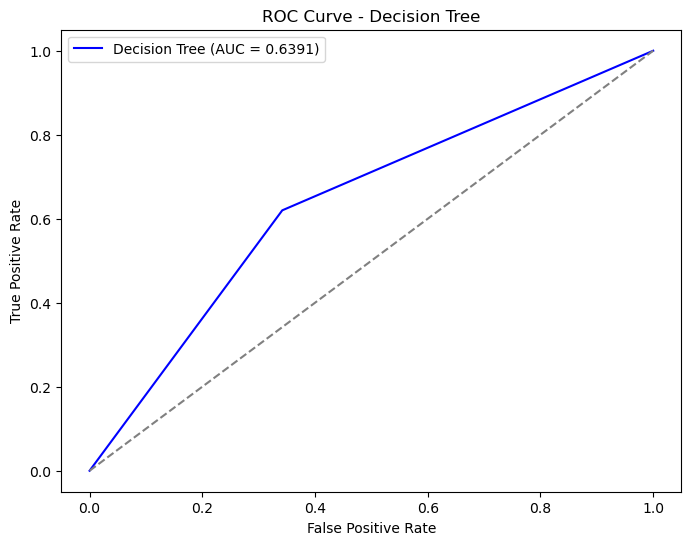

In [40]:
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_pred_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"Decision Tree (AUC = {roc_auc_dt:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

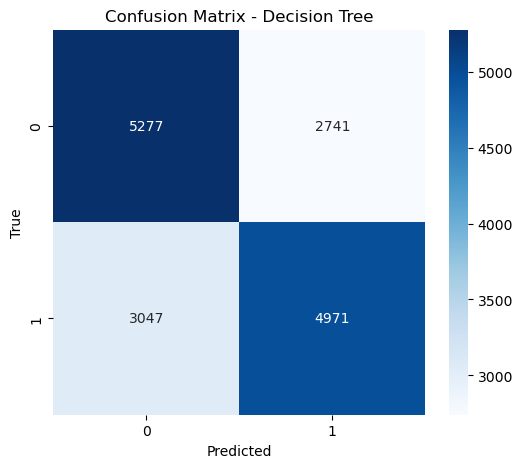

In [41]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The Decision Tree model achieved an accuracy of **67.38%**, with a **precision of 64.42%**, a **recall of 61.96%**, an **F1 score of 63.16%**, and an **AUC of 74.21%**, indicating moderate performance but room for improvement in precision and recall balance.

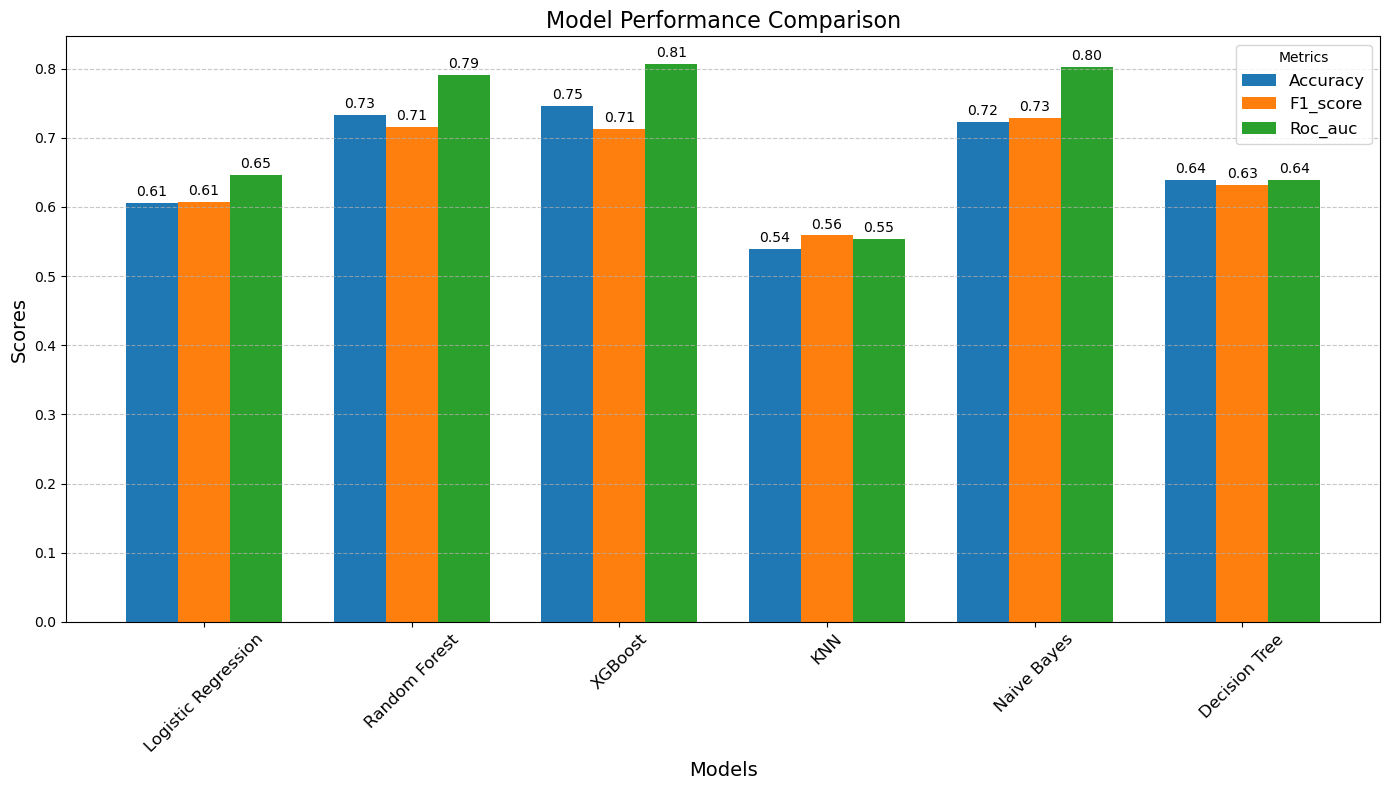

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

model_metrics = {
    "Logistic Regression": {"accuracy": accuracy_log_reg, "f1_score": f1_score_log_reg, "roc_auc": roc_auc_log_reg},
    "Random Forest": {"accuracy": accuracy_rf, "f1_score": f1_score_rf, "roc_auc": roc_auc_rf},
    "XGBoost": {"accuracy": accuracy_xgb, "f1_score": f1_score_xgb, "roc_auc": roc_auc_xgb},
    "KNN": {"accuracy": accuracy_knn, "f1_score": f1_score_knn, "roc_auc": roc_auc_knn},
    "Naive Bayes": {"accuracy": accuracy_nb, "f1_score": f1_score_nb, "roc_auc": roc_auc_nb},
    "Decision Tree": {"accuracy": accuracy_dt, "f1_score": f1_score_dt, "roc_auc": roc_auc_dt},
}

metrics_df = pd.DataFrame.from_dict(model_metrics, orient="index")

metrics = ["accuracy", "f1_score", "roc_auc"]
x = np.arange(len(metrics_df))  
width = 0.25  

fig, ax = plt.subplots(figsize=(14, 8))


for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * width, metrics_df[metric], width, label=metric.capitalize())
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # x 坐标
            height + 0.01,  # y 坐标
            f"{height:.2f}", 
            ha='center', fontsize=10, color='black'
        )

ax.set_xlabel("Models", fontsize=14)
ax.set_ylabel("Scores", fontsize=14)
ax.set_title("Model Performance Comparison", fontsize=16)
ax.set_xticks(x + width)
ax.set_xticklabels(metrics_df.index, fontsize=12, rotation=45)
ax.legend(title="Metrics", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

- Random Forest achieved the highest accuracy (73%) and F1 score (71%), showcasing balanced performance.
- XGBoost leads in ROC AUC (81%), indicating strong discriminative power, though F1 (71%) is slightly lower.
- Naive Bayes has a commendable ROC AUC (80%), but accuracy (72%) and F1 score (73%) are slightly less robust than Random Forest.
- Logistic Regression and Decision Tree offer moderate performance with similar F1 and AUC values (~64%), making them less suitable for complex classification tasks.
- KNN trails with the lowest scores, indicating suboptimal performance in this scenario.

 **XGBoost** emerge as the most effective models for achieving a balance between accuracy, recall, and precision.

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# define adaboost
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

ada = AdaBoostClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV

grid_search_ada = GridSearchCV(estimator=ada, param_grid=ada_params, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search_ada.fit(X_train_resampled, y_train_resampled)
best_ada = grid_search_ada.best_estimator_

with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(best_ada, f)


y_pred_ada = best_ada.predict(X_test_resampled)
y_proba_ada = best_ada.predict_proba(X_test_resampled)[:, 1]


print("AdaBoost Classification Report:")
print(classification_report(y_test_resampled, y_pred_ada))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      8018
           1       0.69      0.75      0.72      8018

    accuracy                           0.70     16036
   macro avg       0.70      0.70      0.70     16036
weighted avg       0.70      0.70      0.70     16036



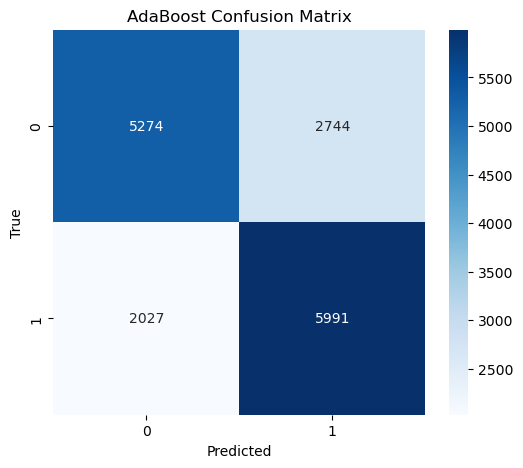

In [44]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_ada)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_ada.classes_, yticklabels=best_ada.classes_)
plt.title("AdaBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

the model demonstrates a balance between precision and recall, but the false negatives could pose challenges in recall-critical scenarios.

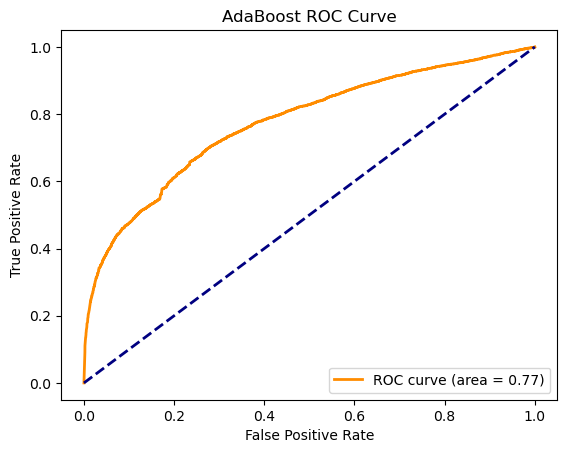

AdaBoost AUC Score: 0.7749002369388258


In [45]:
# ROC 
fpr, tpr, _ = roc_curve(y_test_resampled, y_proba_ada)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AdaBoost AUC Score:", roc_auc)

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#defice voting
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)


voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft' 
)


voting_clf.fit(X_train_resampled, y_train_resampled)

with open('voting_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

y_pred_voting = voting_clf.predict(X_test_resampled)
y_proba_voting = voting_clf.predict_proba(X_test_resampled)[:, 1]

print("Voting Classifier Classification Report:")
print(classification_report(y_test_resampled, y_pred_voting))

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      8018
           1       0.81      0.67      0.73      8018

    accuracy                           0.75     16036
   macro avg       0.76      0.75      0.75     16036
weighted avg       0.76      0.75      0.75     16036



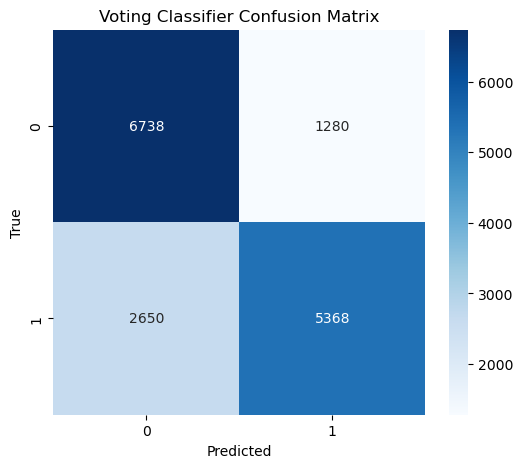

In [47]:
conf_matrix = confusion_matrix(y_test_resampled, y_pred_voting)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=voting_clf.classes_, yticklabels=voting_clf.classes_)
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

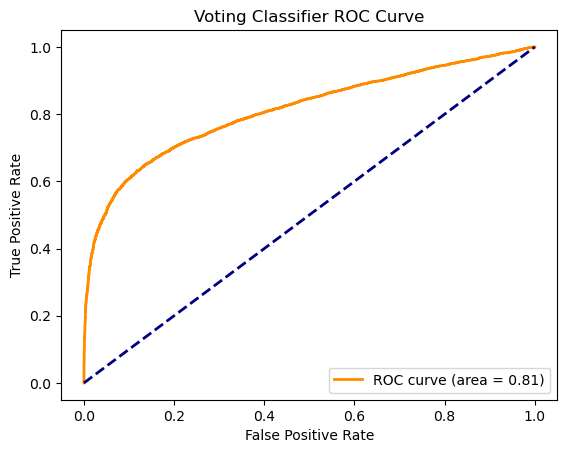

Voting Classifier AUC Score: 0.8117614016504769


In [48]:
# ROC 
fpr, tpr, _ = roc_curve(y_test_resampled, y_proba_voting)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Voting Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("Voting Classifier AUC Score:", roc_auc)

The Voting Classifier achieved an accuracy of 75%, with precision of 72% for class 0 and 81% for class 1, and a balanced F1-score of 75%. The ROC AUC score of 81% indicates strong discriminative ability between the classes. This model effectively balances sensitivity and specificity, identifying both positive and negative classes with high confidence.

---------------------------------------------------------------------------------

## 5. Use prompt to input features to get predicted values

In [ ]:
import pickle
import pandas as pd

model_file = 'logistic_regression_model.pkl'  

with open(model_file, 'rb') as f:
    model = pickle.load(f)

input_features = {
    'ID': 1,  
    'Age_in_months': 24,
    'Year': 2023,  
    'Gaze_pattern_on_faces_%': 75.5,
    'Joint_attention_%': 65.0,
    'Babbling_frequency_per_min': 10.0,
    'Response_to_name_%': 85.0,
    'Heart_rate_variability_ms': 50.0,
    'Sleep_duration_hrs_per_night': 8.0,
    'Social_engagement_%': 70.0,
    'Motor_milestone_delay_months': 0,
    'Sensory_sensitivity_level': 'Low', 
    'Parent_interaction_score': 20.0,
    'Fine_motor_skills_score': 15.0,
    'Gross_motor_skills_score': 10.0,
    'Eye_tracking_latency_ms': 180.0,
    'Response_to_visual_stimuli_%': 90.0,
    'Language_comprehension_score': 80.0,
    'Speech_delay_months': 2,
    'Auditory_sensitivity_level': 'High', 
    'Cognitive_development_score': 85.0,
    'Emotional_regulation_score': 70.0,
    'Repetitive_behavior_frequency': 5,
    'Eye_contact_duration_secs': 3.0,
    'Engagement_in_play_%': 80.0,
    'Stress_response_score': 90.0,
    'Reaction_time_to_cues_secs': 1.5,
    'Behavioral_anomalies_%': 15.0,
    'Adaptability_score': 75.0
}

model_features = [
    'ID', 'Age_in_months', 'Year', 'Gaze_pattern_on_faces_%', 'Joint_attention_%',
    'Babbling_frequency_per_min', 'Response_to_name_%', 'Heart_rate_variability_ms',
    'Sleep_duration_hrs_per_night', 'Social_engagement_%', 'Motor_milestone_delay_months',
    'Sensory_sensitivity_level', 'Parent_interaction_score', 'Fine_motor_skills_score',
    'Gross_motor_skills_score', 'Eye_tracking_latency_ms', 'Response_to_visual_stimuli_%',
    'Language_comprehension_score', 'Speech_delay_months', 'Auditory_sensitivity_level',
    'Cognitive_development_score', 'Emotional_regulation_score', 'Repetitive_behavior_frequency',
    'Eye_contact_duration_secs', 'Engagement_in_play_%', 'Stress_response_score',
    'Reaction_time_to_cues_secs', 'Behavioral_anomalies_%', 'Adaptability_score'
]

input_df = pd.DataFrame([input_features])

category_mappings = {
    'Sensory_sensitivity_level': {'Low': 0, 'Normal': 1, 'High': 2},
    'Auditory_sensitivity_level': {'Low': 0, 'Normal': 1, 'High': 2}
}

for col, mapping in category_mappings.items():
    input_df[col] = input_df[col].map(mapping)

input_df = input_df[model_features]

try:
    predicted_class = model.predict(input_df)[0]  
    predicted_proba = model.predict_proba(input_df)[0]  
    print("Predicted Class:", predicted_class)
    print("Predicted Probabilities:", predicted_proba)
except Exception as e:
    print("Error during prediction:", str(e))

Predicted Class: 0
Predicted Probabilities: [1.00000000e+000 3.95267174e-161]


You can enter features through the prompt to get predicted values

**Why machine learning?**
- Precision & Speed: Processes large datasets quickly, ensuring accurate and reliable predictions.
- Handles Complexity: Identifies subtle patterns in behavioral and developmental data.
- Scalable: Improves accuracy and efficiency as more data is gathered.
- Manages Imbalanced Data: Techniques like SMOTE ensure unbiased predictions.
- Cost-Effective: Reduces reliance on costly diagnostic tools, making screening accessible.
- Enables Early Interventions: Detects autism early, allowing timely therapies for better outcomes.
- Data-Driven Decisions: Empowers hospitals with actionable insights.
- Customizable & Adaptive: Tailored for diverse populations, improving over time.
- Seamless Integration: Fits within existing hospital IT systems, streamlining workflows.